In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings

import pandas as pd
import numpy as np
import pandas_datareader.data as web

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette('cubehelix')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

#  Carimento dei Dati

In [15]:
start_date = '30-11-2011'
end_date = '30-11-2021'
stocks = ['JPM', 'BLK', 'XOM', 'CVX', 'AAPL', 'TSLA']
xle_path = './data/BATS_XLE, 1D_bb421.csv'
xlf_path = './data/BATS_XLF, 1D_e79b8.csv'
xlk_path = './data/BATS_XLK, 1D_d34c0.csv'

In [16]:
stocks_df = web.DataReader(stocks, 'yahoo', start_date, end_date)
xle_df = pd.read_csv(xle_path, sep=',', parse_dates=True)
xlk_df = pd.read_csv(xlk_path, sep=',', parse_dates=True)
xlf_df = pd.read_csv(xlf_path, sep=',', parse_dates=True)

In [17]:
xle_df['date'] = pd.to_datetime(xle_df['time']).apply(lambda x: x.date())
xle_df['date'] = pd.to_datetime(xle_df['date'], format='%Y-%m-%d')

xlk_df['date'] = pd.to_datetime(xlk_df['time']).apply(lambda x: x.date())
xlk_df['date'] = pd.to_datetime(xlk_df['date'], format='%Y-%m-%d')

xlf_df['date'] = pd.to_datetime(xlf_df['time']).apply(lambda x: x.date())
xlf_df['date'] = pd.to_datetime(xlf_df['date'], format='%Y-%m-%d')



In [19]:
xle_df.set_index('date', inplace=True)
xle_df.drop('time', axis=1, inplace=True)
xlk_df.set_index('date', inplace=True)
xlk_df.drop('time', axis=1, inplace=True)
xlf_df.set_index('date', inplace=True)
xlf_df.drop('time', axis=1, inplace=True)

In [23]:
xle_df = xle_df[start_date:end_date]
xlk_df = xlk_df[start_date:end_date]
xlf_df = xlf_df[start_date:end_date]


In [25]:
stocks_df.head()

Attributes  Adj Close                                                      \
Symbols           JPM         BLK        XOM        CVX       AAPL   TSLA   
Date                                                                        
2011-11-30  23.506090  132.182800  53.403614  68.145973  11.703032  6.548   
2011-12-01  23.119007  129.661819  52.972107  67.489815  11.878487  6.520   
2011-12-02  24.538328  130.908783  52.972107  67.397026  11.932689  6.660   
2011-12-05  25.433935  136.554993  53.410271  68.145973  12.034039  6.884   
2011-12-06  25.221422  134.347641  53.655903  69.166611  11.970958  6.974   

Attributes      Close                                     ...       Open  \
Symbols           JPM         BLK        XOM         CVX  ...        XOM   
Date                                                      ...              
2011-11-30  30.969999  172.039993  80.440002  102.820000  ...  78.419998   
2011-12-01  30.459999  167.410004  79.790001  101.830002  ...  80.199997   
2011-12-02  32.330002  169.020004  79.790001  101.690002  ...  80.669998   
2011-12-05  33.509998  176.309998  80.449997  102.820000  ...  80.879997   
2011-12-06  33.230000  173.460007  80.820000  104.360001  ...  80.629997   

Attributes                                    Volume                         \
Symbols            CVX       AAPL   TSLA         JPM        BLK         XOM   
Date                                                                          
2011-11-30  100.500000  13.617500  6.500  61412600.0  1388200.0  33953000.0   
2011-12-01  102.820000  13.662143  6.514  33189700.0   752500.0  17261100.0   
2011-12-02  103.040001  13.922500  6.566  90515100.0   618200.0  19461300.0   
2011-12-05  103.580002  14.053214  6.706  52207600.0  1009300.0  18295000.0   
2011-12-06  103.099998  14.018214  6.840  38782900.0   530100.0  20122700.0   

Attributes                                      
Symbols            CVX         AAPL       TSLA  
Date                                            
2011-11-30  13373200.0  405938400.0  3801500.0  
2011-12-01   7007200.0  387181200.0  5151000.0  
2011-12-02   6638100.0  379055600.0  4014000.0  
2011-12-05   6121800.0  357210000.0  5800500.0  
2011-12-06   7445000.0  283598000.0  4759000.0  

[5 rows x 36 columns]

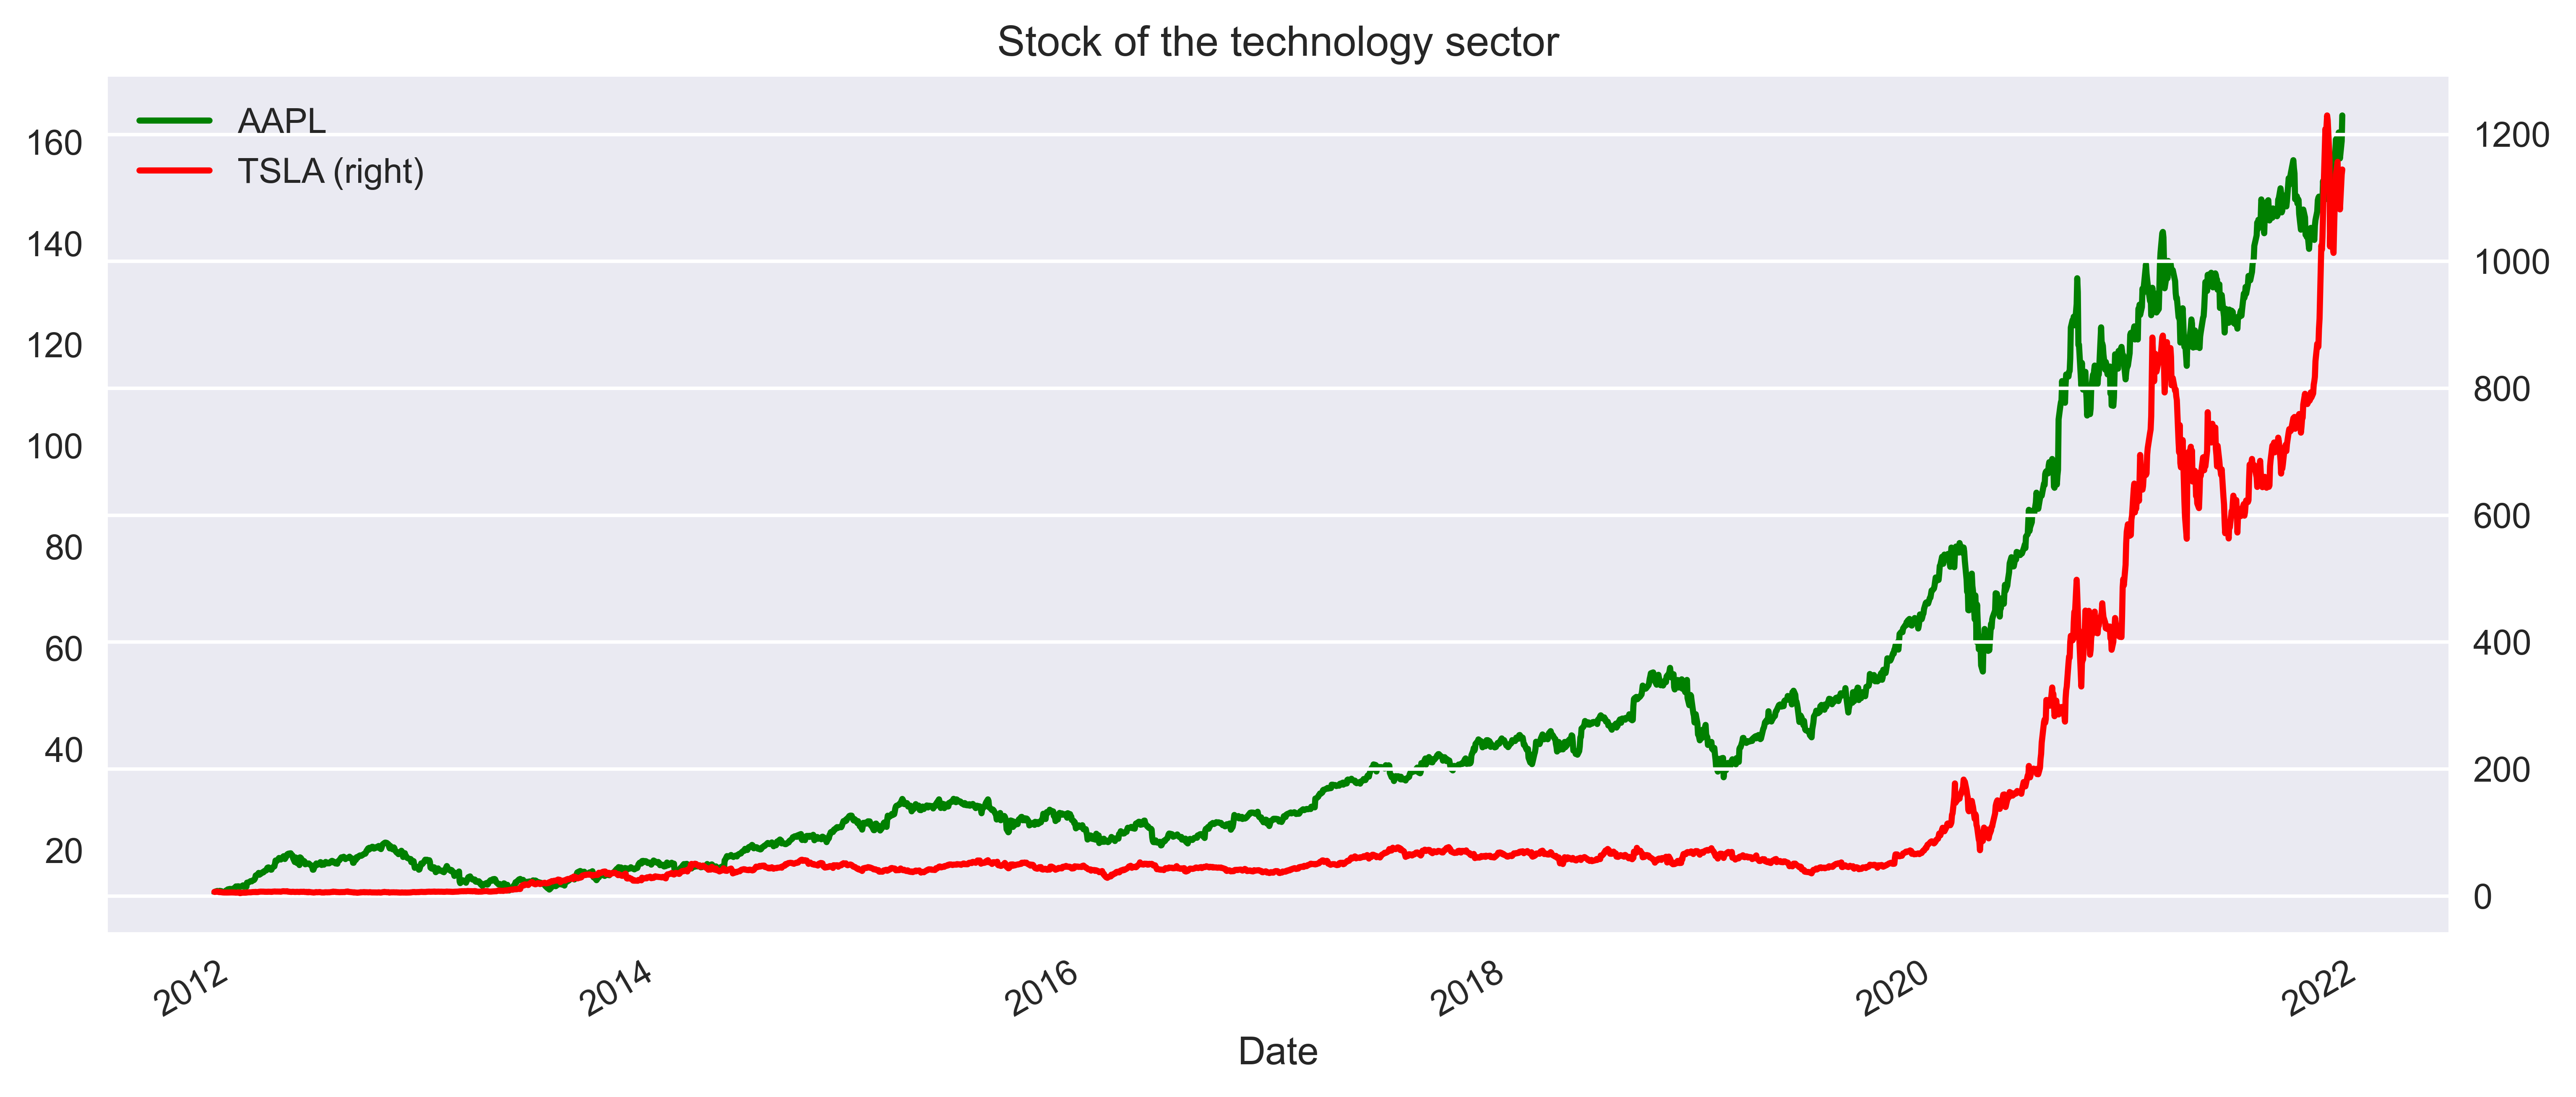

In [26]:
plt.figure(figsize=(12, 5))
plt.xlabel('Date')

ax1 = stocks_df['Adj Close'].loc[:, 'AAPL'].plot(color='green', label='AAPL', title='Stock of the technology sector')
ax2 = stocks_df['Adj Close'].loc[:, 'TSLA'].plot(color='red', secondary_y=True, label='TSLA')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

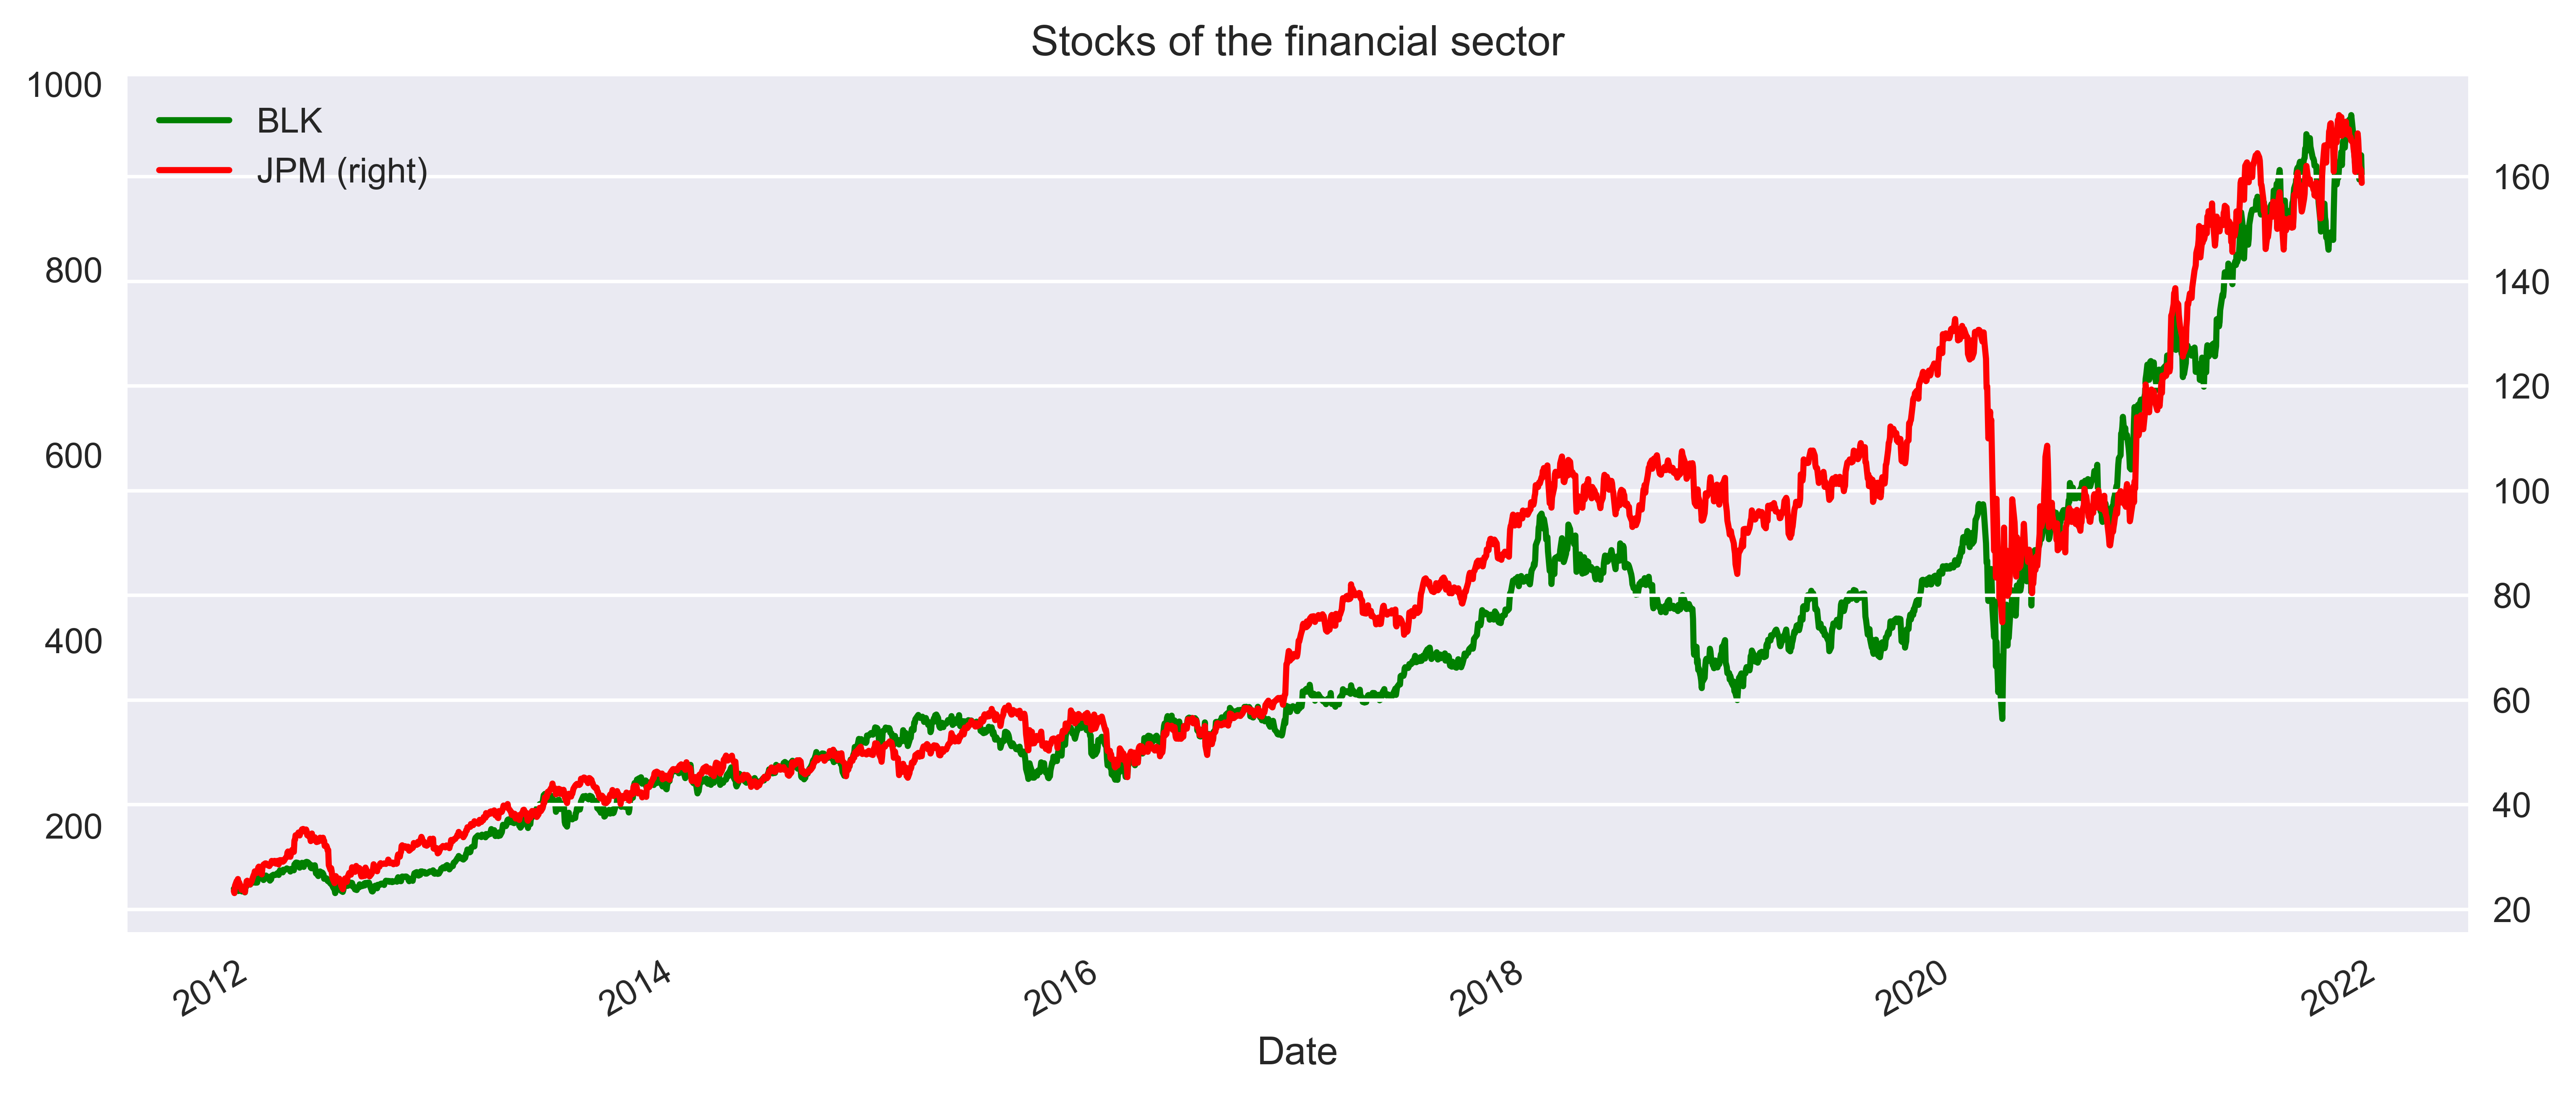

In [27]:
plt.figure(figsize=(12, 5))
plt.xlabel('Date')

ax1 = stocks_df['Adj Close'].loc[:, 'BLK'].plot(color='green', label='BLK', title='Stocks of the financial sector')
ax2 = stocks_df['Adj Close'].loc[:, 'JPM'].plot(color='red', secondary_y=True, label='JPM')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

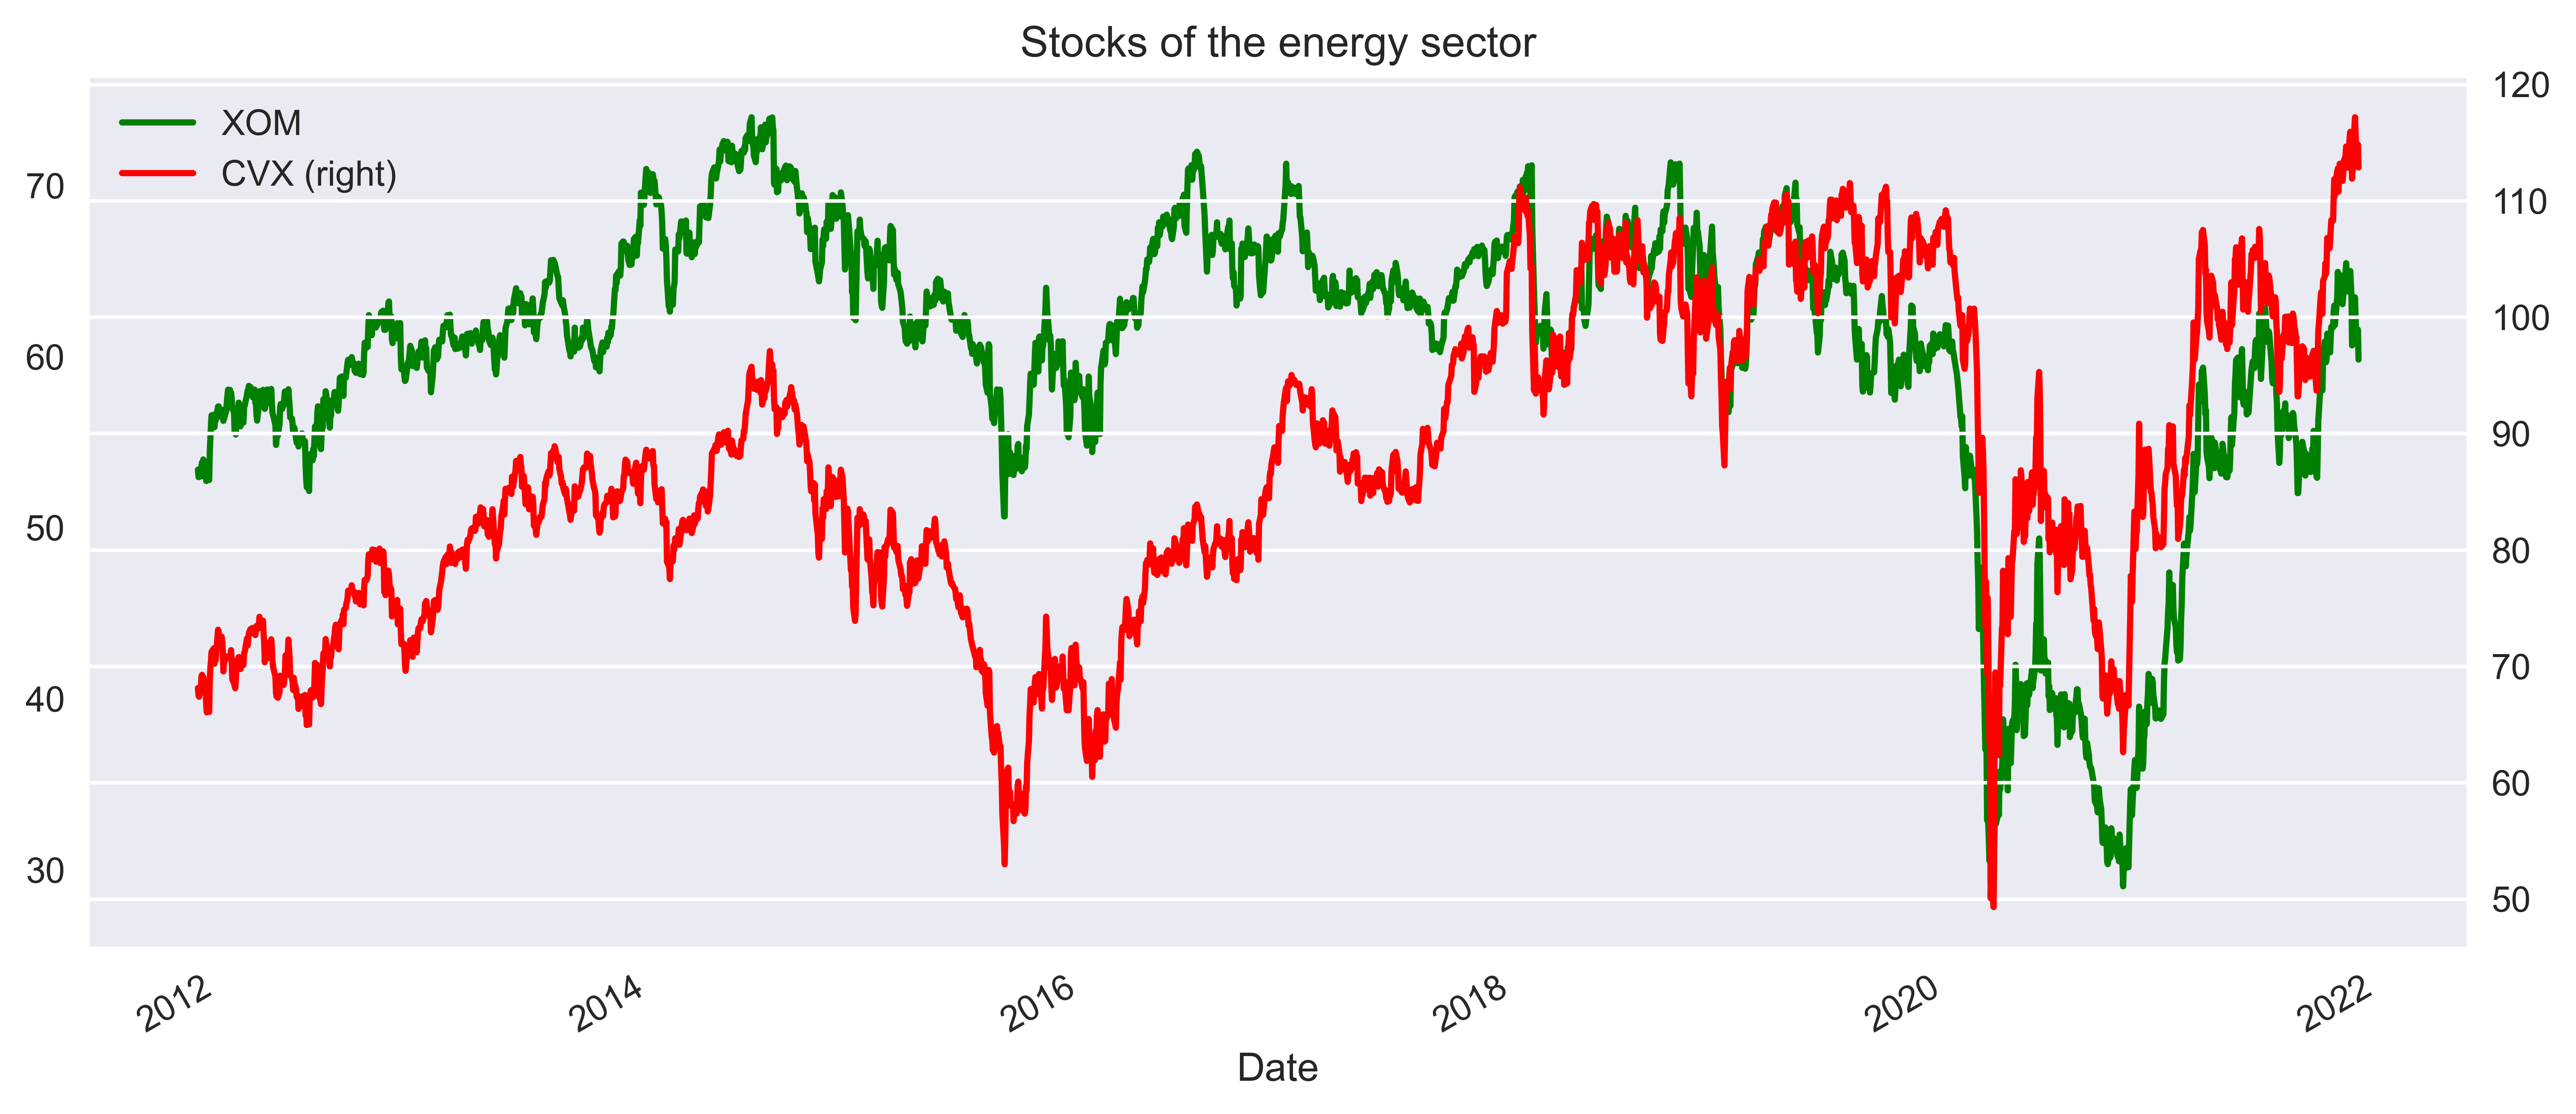

In [28]:
plt.figure(figsize=(12, 5))
plt.xlabel('Date')

ax1 = stocks_df['Adj Close'].loc[:, 'XOM'].plot(color='green', label='XOM', title='Stocks of the energy sector')
ax2 = stocks_df['Adj Close'].loc[:, 'CVX'].plot(color='red', secondary_y=True, label='CVX')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

# Analisi Eslorativa

# Rendimenti Semplici e Composti

In [29]:
returns_df = stocks_df['Adj Close'].pct_change().dropna()

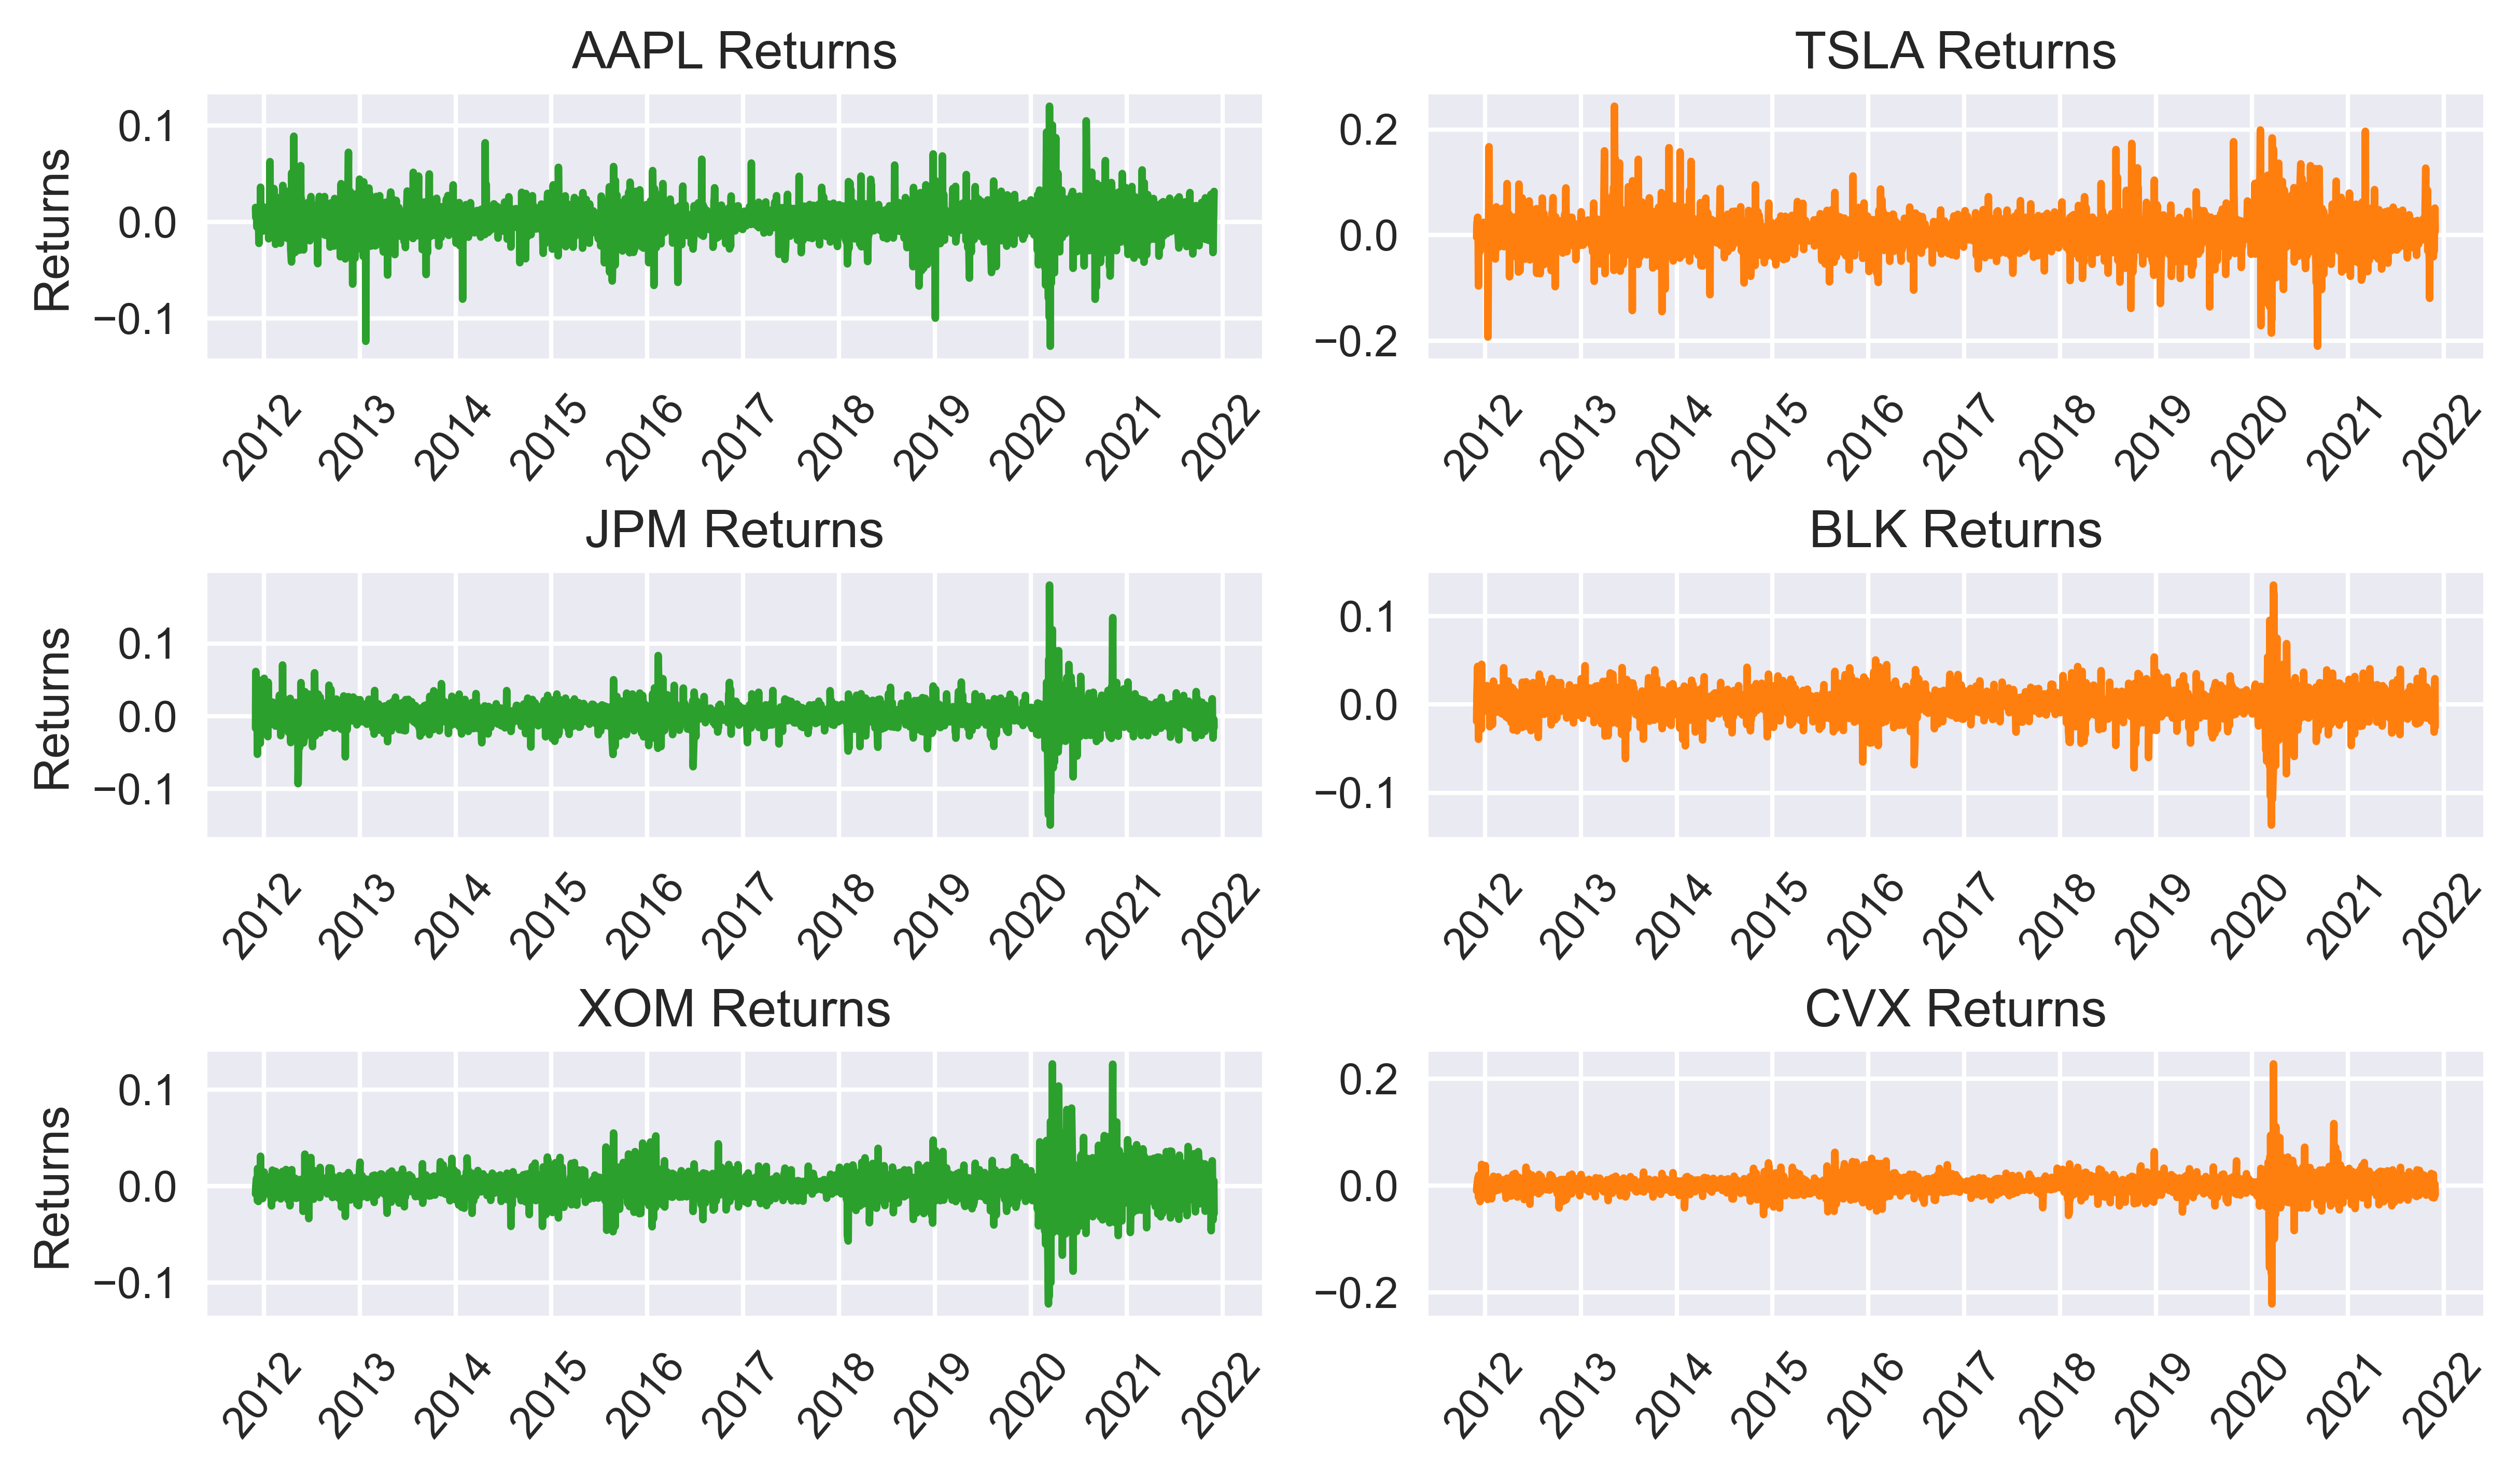

In [30]:
fig, axs = plt.subplots(3, 2)
fig.tight_layout(h_pad=3)

color_1 = 'tab:green'
color_2 = 'tab:orange'

axs[0, 0].set(ylabel='Returns',
       title='AAPL Returns')
axs[0, 0].plot(returns_df.loc[:, 'AAPL'], color=color_1)
axs[0, 0].tick_params(axis="x", rotation=50)
axs[0, 1].set(title='TSLA Returns')
axs[0, 1].plot(returns_df.loc[:, 'TSLA'], color=color_2)
axs[0, 1].tick_params(axis="x", rotation=50)

axs[1, 0].set(ylabel='Returns',
              title='JPM Returns')
axs[1, 0].plot(returns_df.loc[:, 'JPM'], color=color_1)
axs[1, 0].tick_params(axis="x", rotation=50)
axs[1, 1].set(title='BLK Returns')
axs[1, 1].plot(returns_df.loc[:, 'BLK'], color=color_2)
axs[1, 1].tick_params(axis="x", rotation=50)

axs[2, 0].set(ylabel='Returns',
              title='XOM Returns')
axs[2, 0].plot(returns_df.loc[:, 'XOM'], color=color_1)
axs[2, 0].tick_params(axis="x", rotation=50)
axs[2, 1].set(title='CVX Returns')
axs[2, 1].plot(returns_df.loc[:, 'CVX'], color=color_2)
axs[2, 1].tick_params(axis="x", rotation=50)

plt.show()

In [31]:
log_returns = np.log(stocks_df['Adj Close']/stocks_df['Adj Close'].shift(1)).dropna()

## Distribuzioni dei Ritorni Logaritmici

In [32]:
import scipy.stats as stats

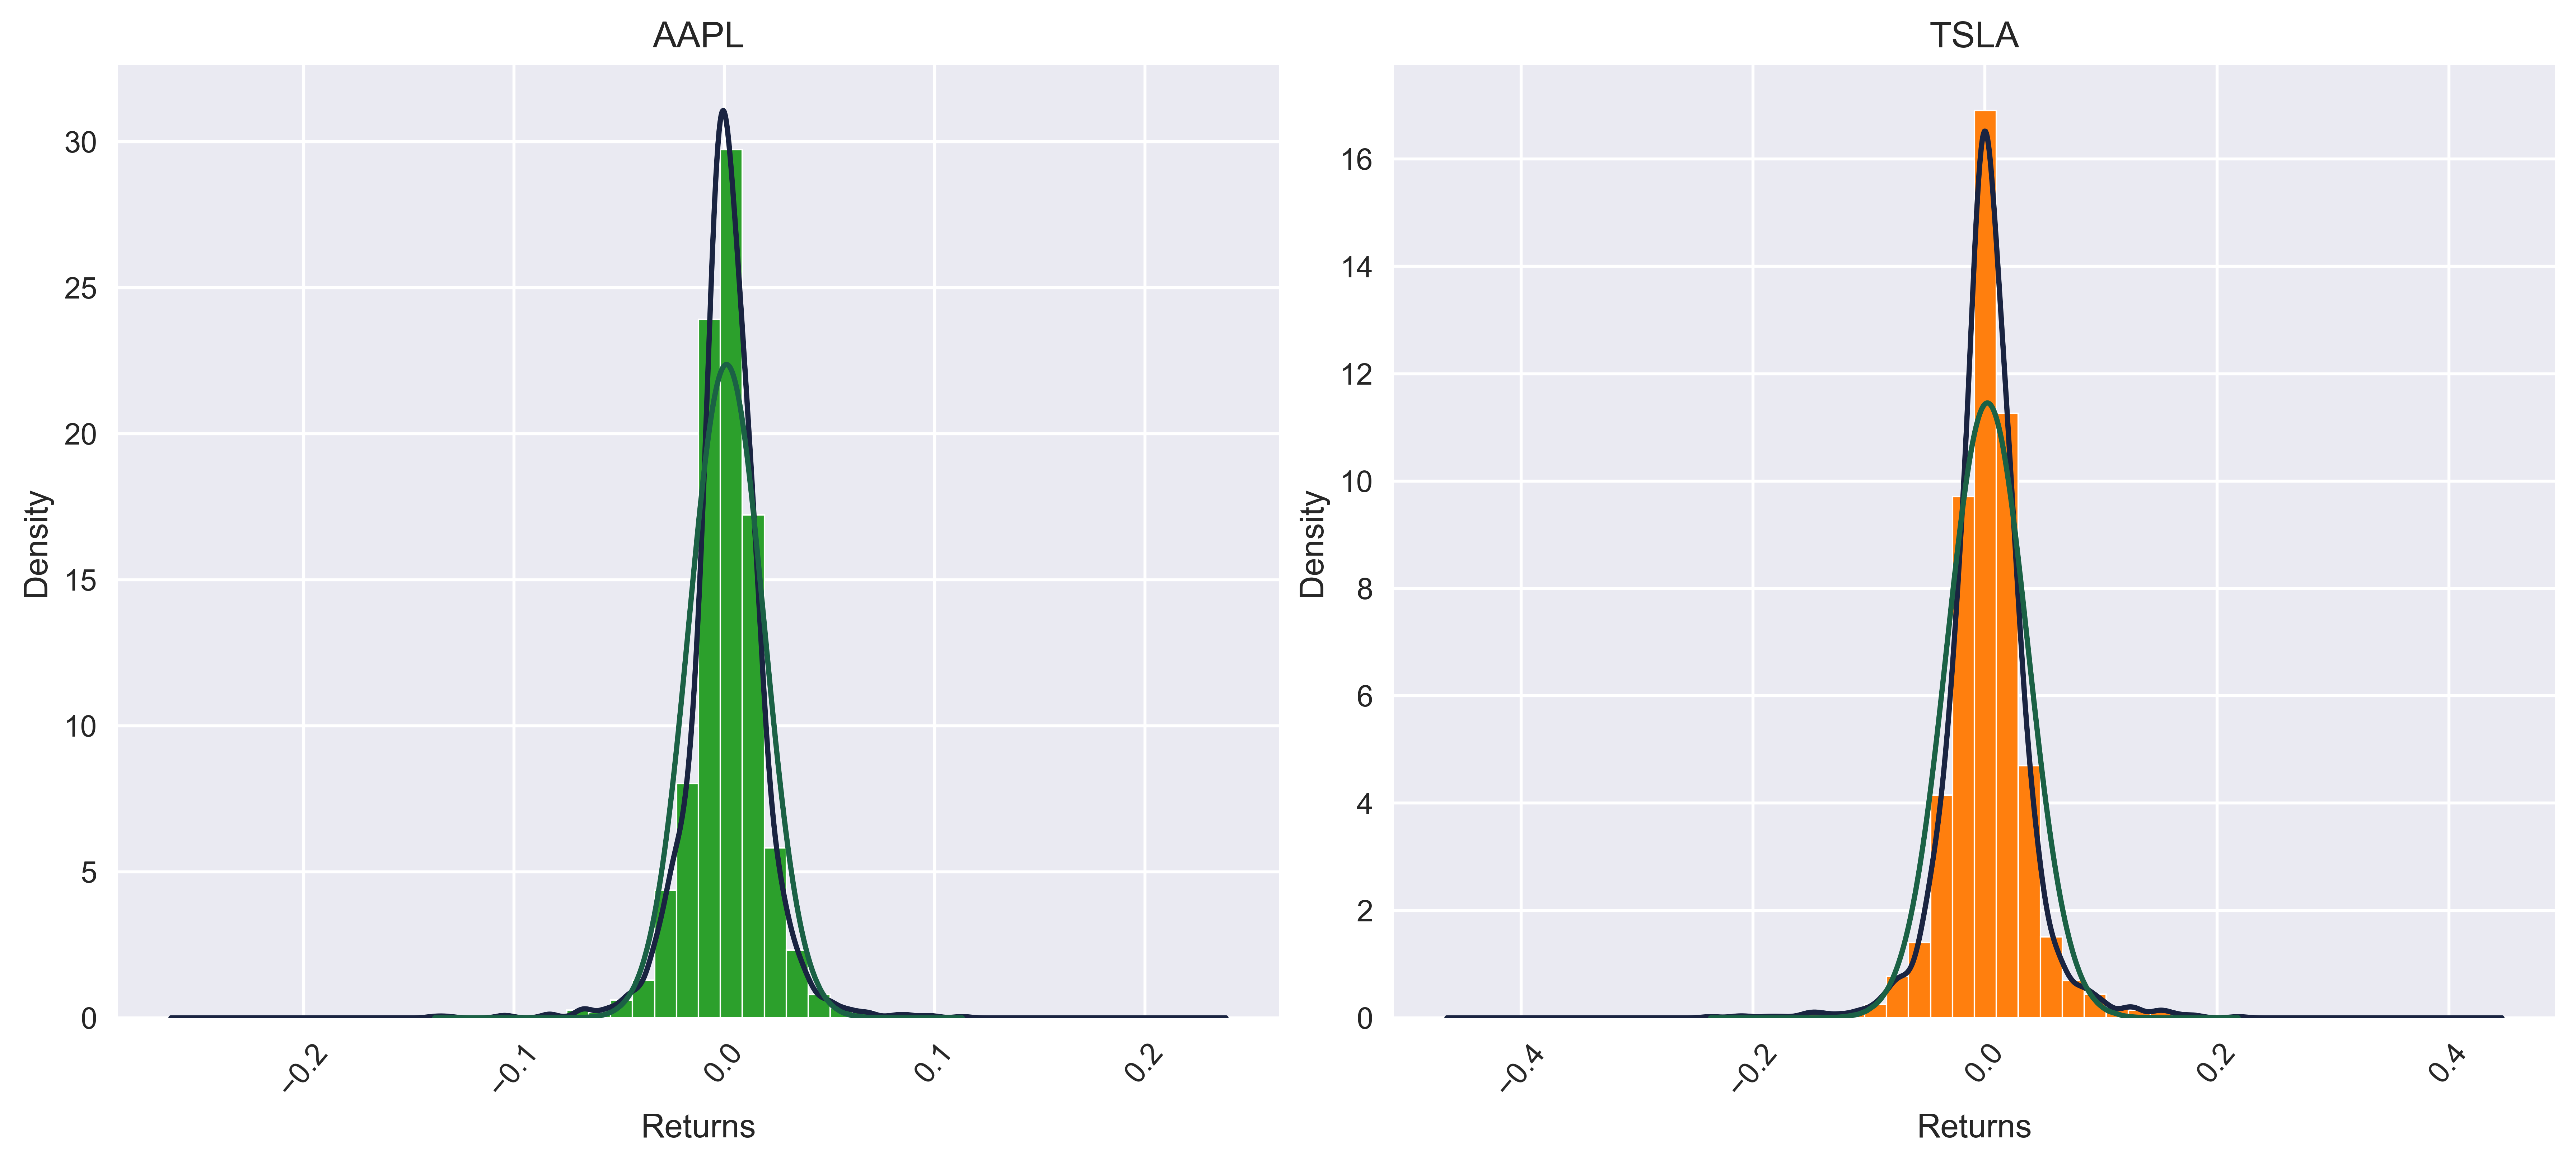

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(h_pad=3)

color_1 = 'tab:green'
color_2 = 'tab:orange'

axs[0].set(xlabel='Returns',
              title='AAPL')
axs[0].hist(log_returns.loc[:, 'AAPL'], color=color_1, bins=24, linewidth=0.5, edgecolor="white", density=True)
log_returns.loc[:, 'AAPL'].plot.density(ax=axs[0])
h = sorted(log_returns.loc[:, 'AAPL'].values)
axs[0].plot(h,stats.norm.pdf(h, np.mean(h), np.std(h)))
axs[0].tick_params(axis="x", rotation=50)

axs[1].set(xlabel='Returns', title='TSLA')
axs[1].hist(log_returns.loc[:, 'TSLA'], color=color_2, bins=24, linewidth=0.5,edgecolor="white", density=True)
log_returns.loc[:, 'TSLA'].plot.density(ax=axs[1])
h = sorted(log_returns.loc[:, 'TSLA'].values)
axs[1].plot(h,stats.norm.pdf(h, np.mean(h), np.std(h)))
axs[1].tick_params(axis="x", rotation=50)

plt.show()

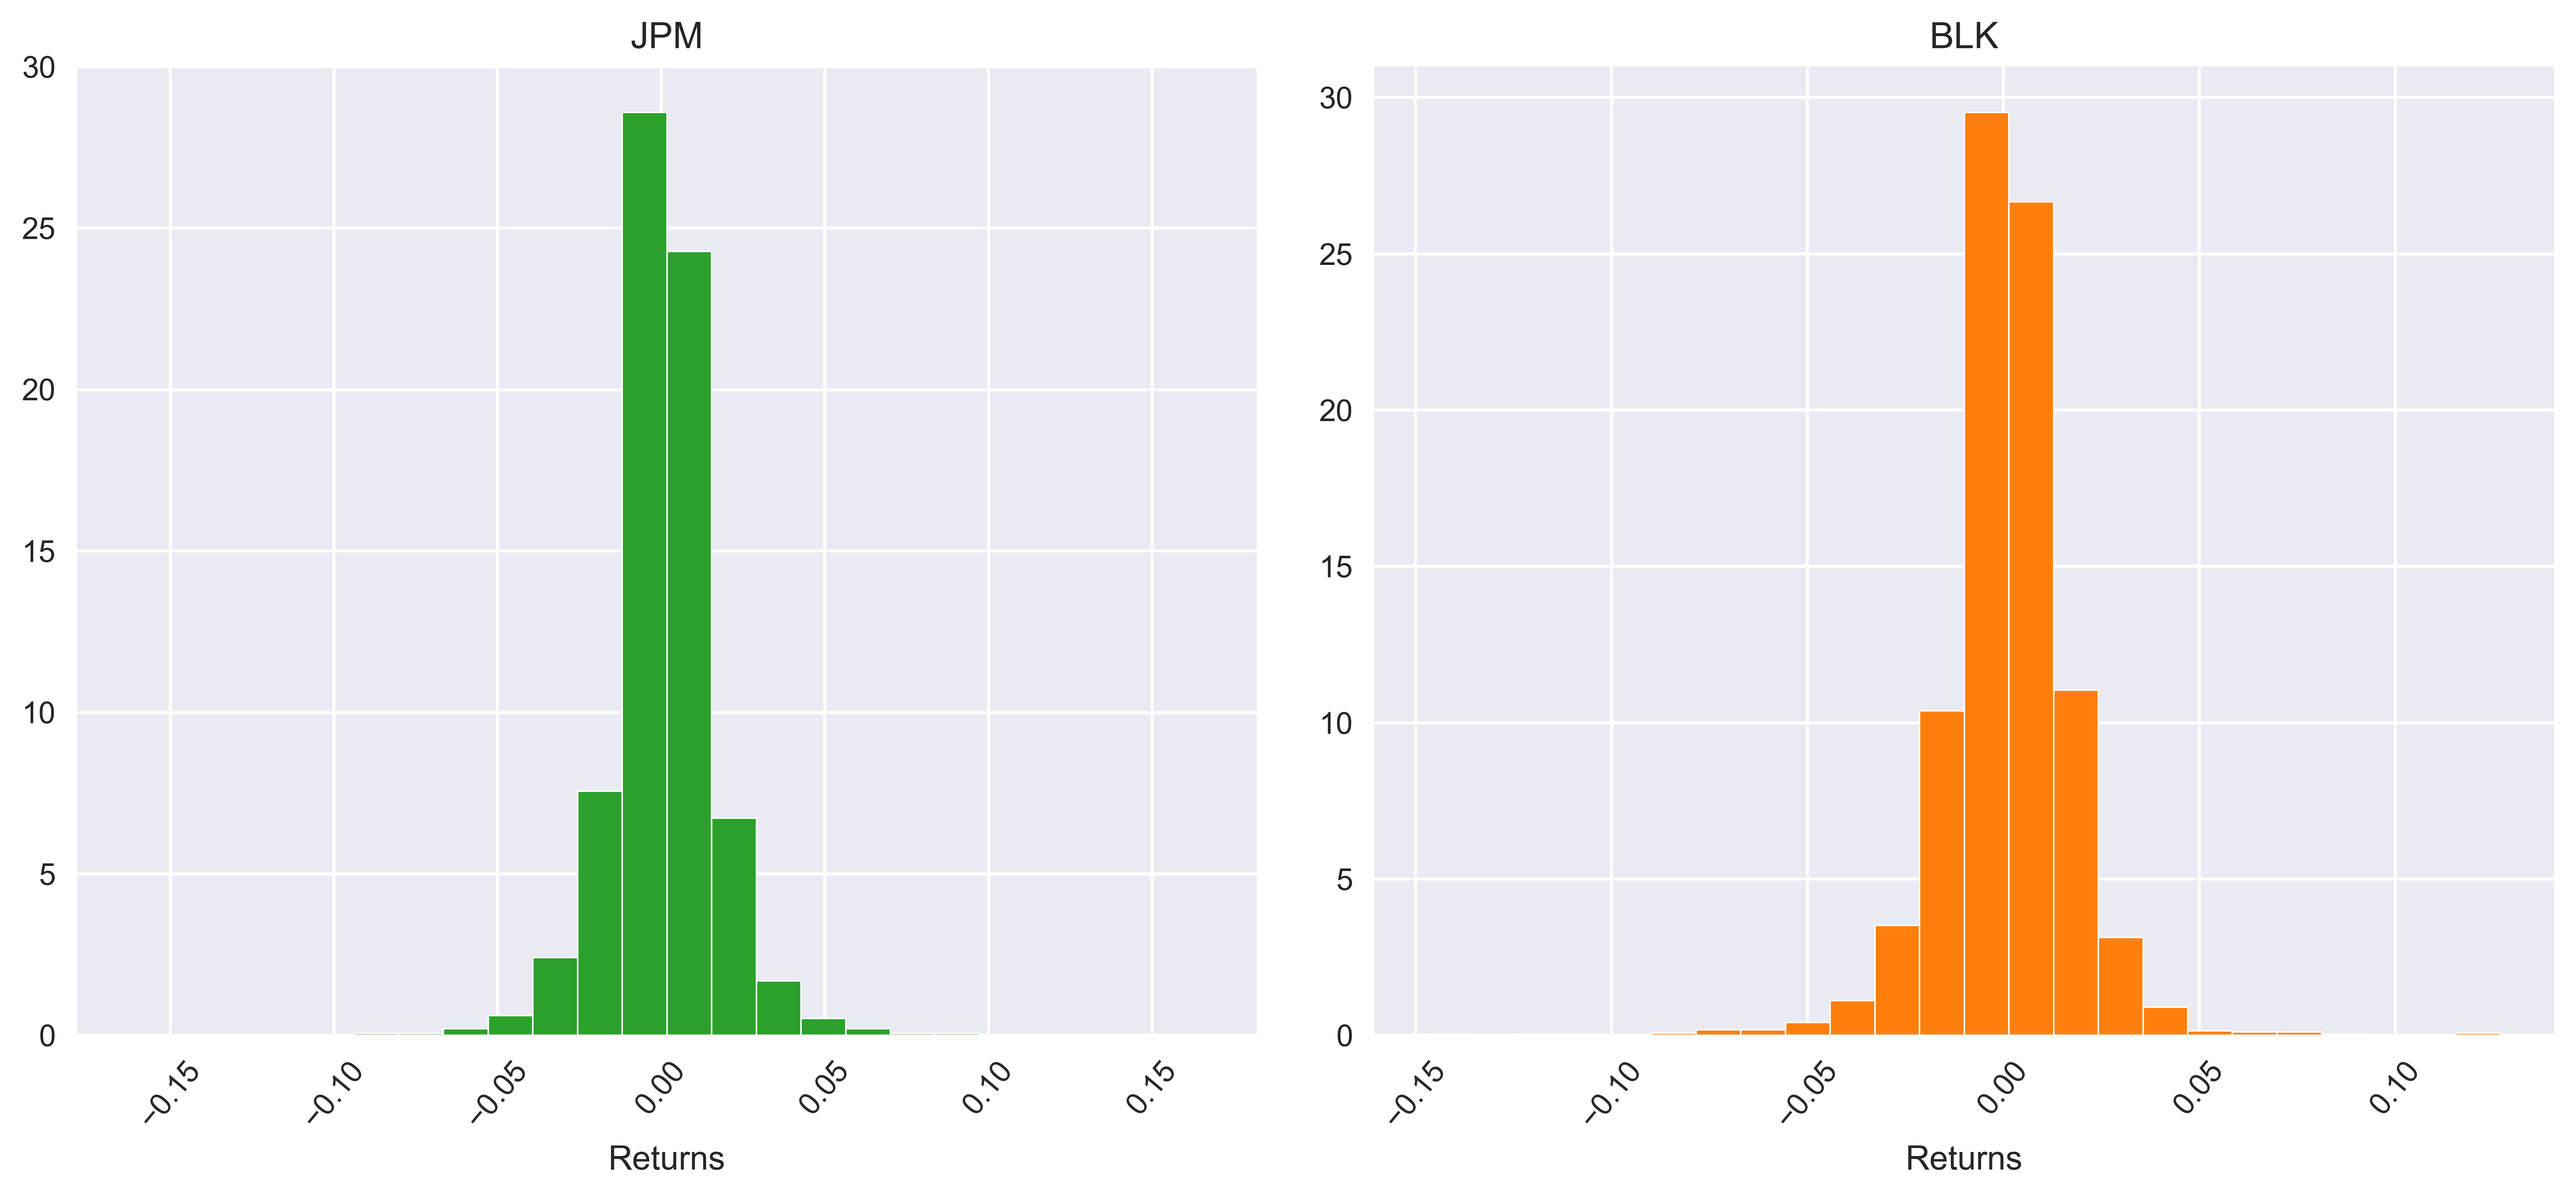

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(h_pad=3)

color_1 = 'tab:green'
color_2 = 'tab:orange'

axs[0].set(xlabel='Returns',
           title='JPM')
axs[0].hist(log_returns.loc[:, 'JPM'], color=color_1, bins=24, linewidth=0.5, edgecolor="white", density=True)
axs[0].tick_params(axis="x", rotation=50)
axs[1].set(xlabel='Returns', title='BLK')
axs[1].hist(log_returns.loc[:, 'BLK'], color=color_2, bins=24, linewidth=0.5,edgecolor="white", density=True)
axs[1].tick_params(axis="x", rotation=50)

plt.show()

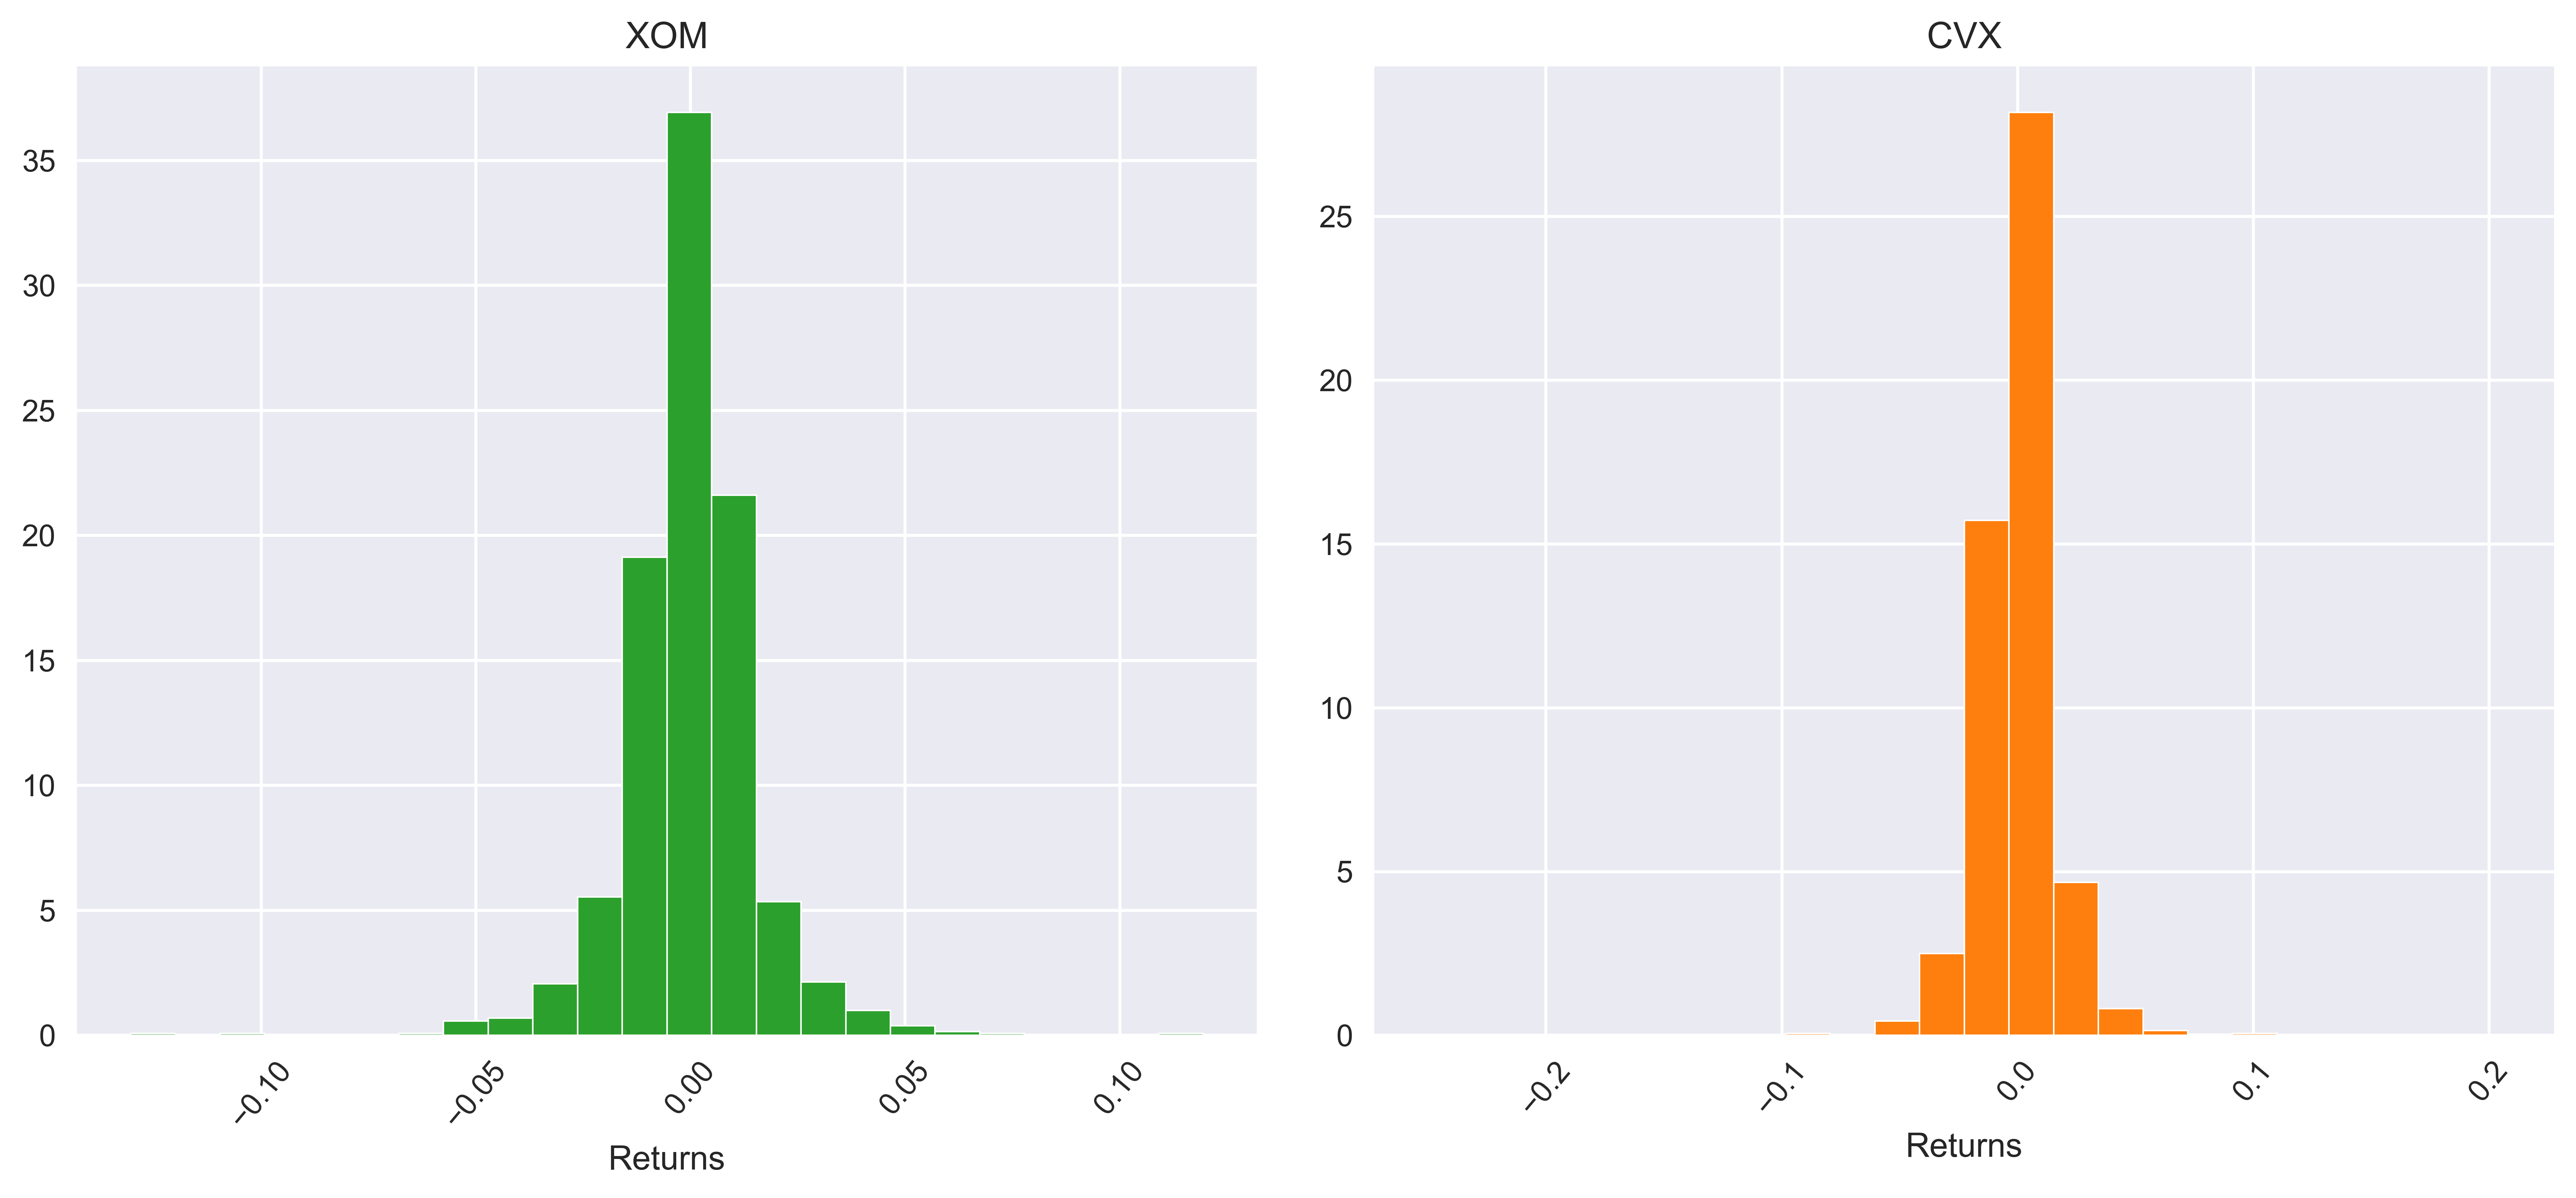

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(h_pad=3)

color_1 = 'tab:green'
color_2 = 'tab:orange'

axs[0].set(xlabel='Returns',
           title='XOM')
axs[0].hist(log_returns.loc[:, 'XOM'], color=color_1, bins=24, linewidth=0.5, edgecolor="white", density=True)
axs[0].tick_params(axis="x", rotation=50)
axs[1].set(xlabel='Returns', title='CVX')
axs[1].hist(log_returns.loc[:, 'CVX'], color=color_2, bins=24, linewidth=0.5,edgecolor="white", density=True)
axs[1].tick_params(axis="x", rotation=50)

plt.show()

c:\users\paolo\pycharmprojects\ng-strategies\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
c:\users\paolo\pycharmprojects\ng-strategies\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


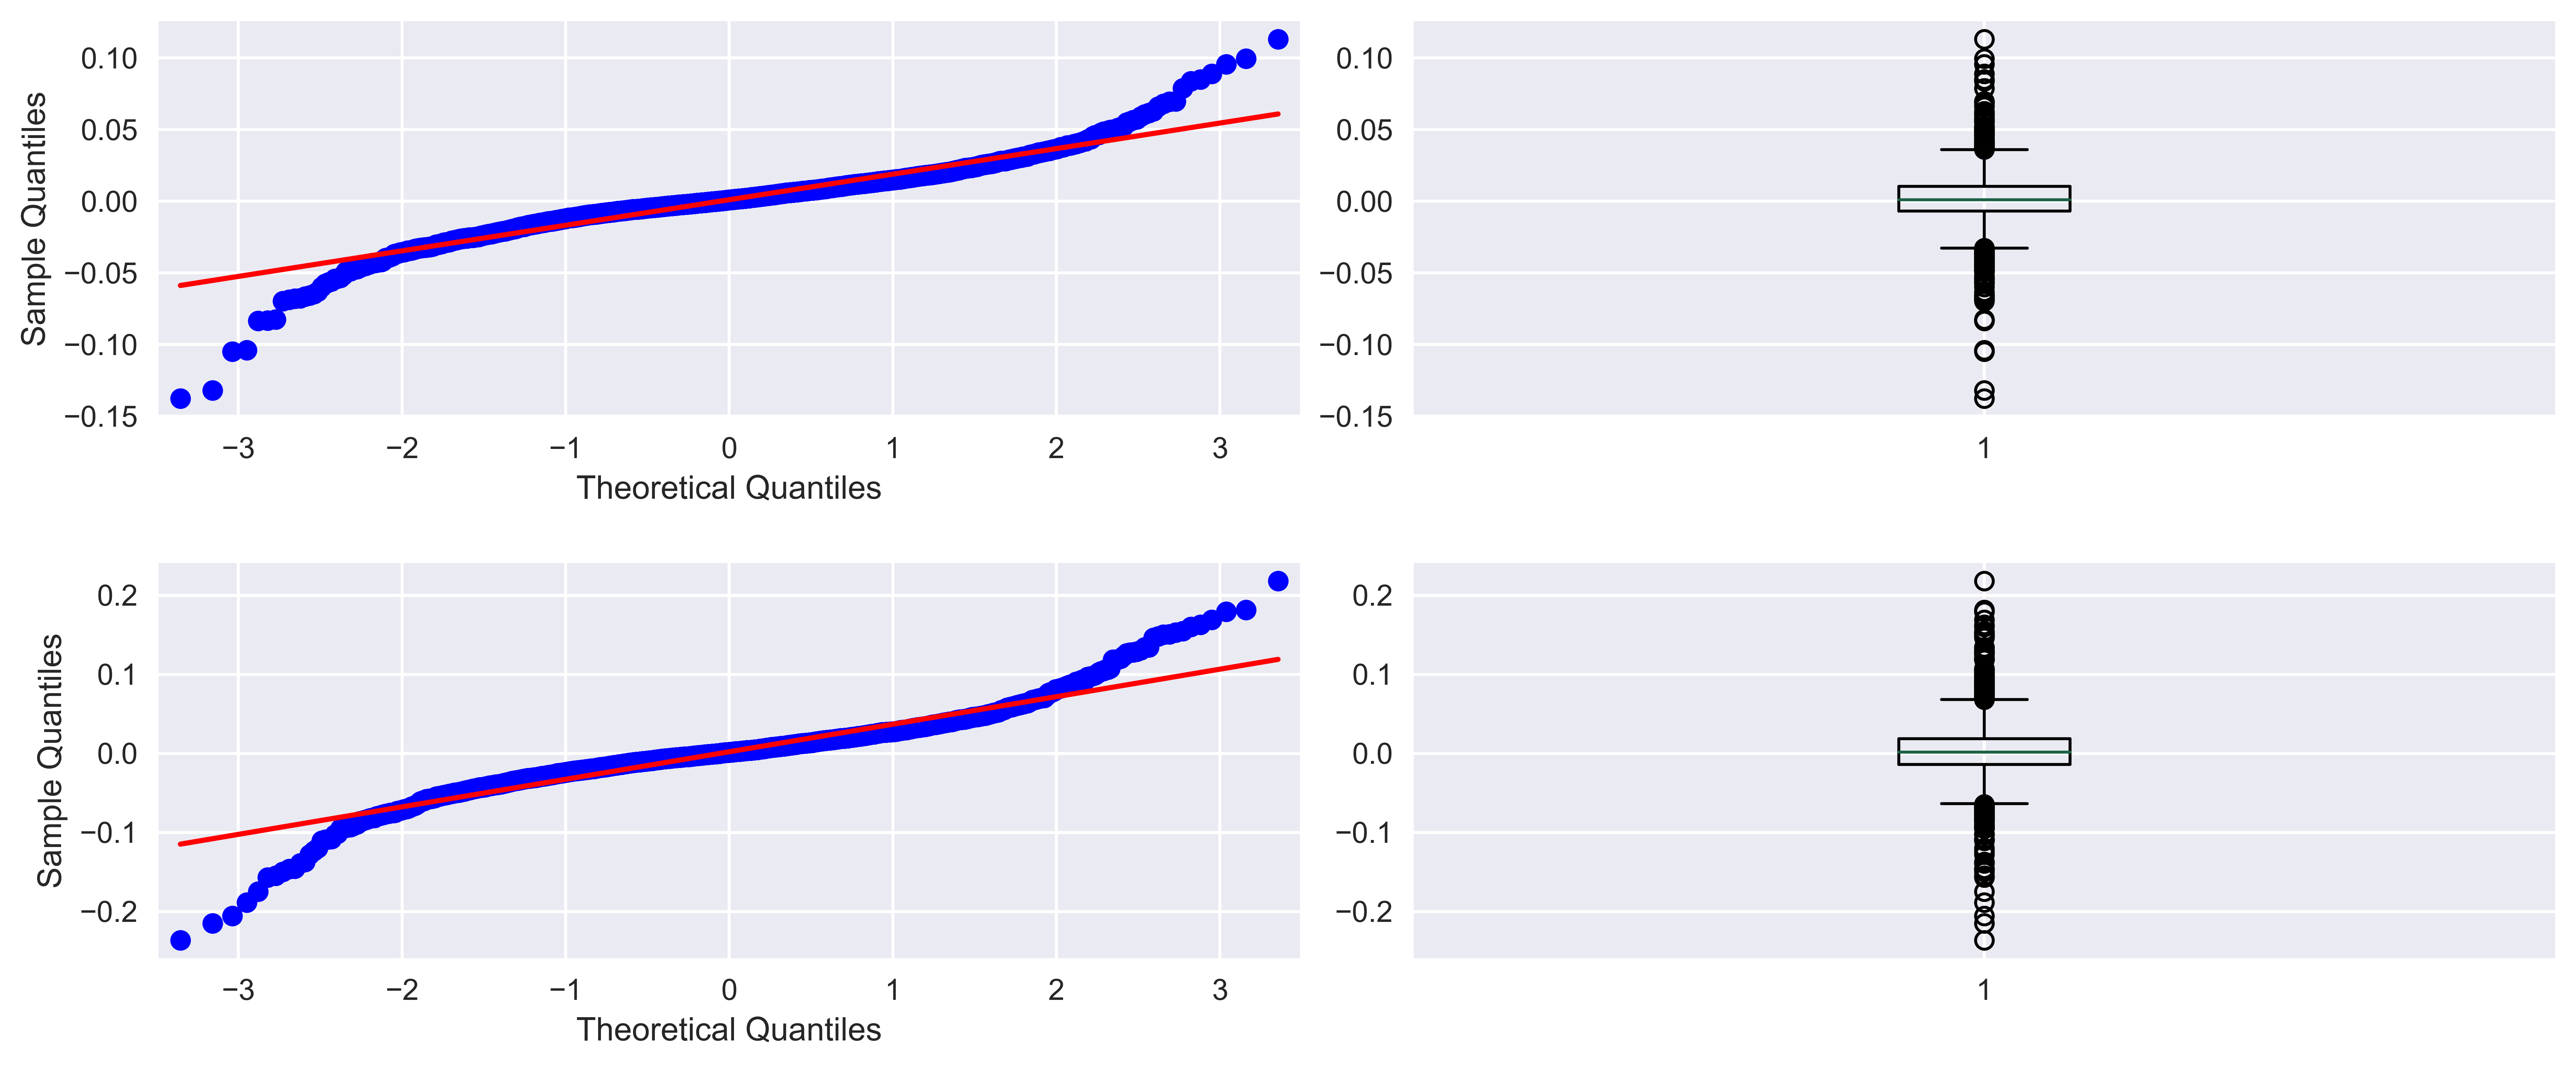

In [36]:
import statsmodels.api as sm

fig, axs = plt.subplots(2, 2, figsize=(12, 5))
fig.tight_layout(h_pad=3)

sm.qqplot(log_returns.loc[:, 'AAPL'], line = 's', ax=axs[0, 0])
axs[0, 1].boxplot(log_returns.loc[:, 'AAPL'])

sm.qqplot(log_returns.loc[:, 'TSLA'], line = 's', ax=axs[1, 0])
axs[1, 1].boxplot(log_returns.loc[:, 'TSLA'])

plt.show();

c:\users\paolo\pycharmprojects\ng-strategies\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
c:\users\paolo\pycharmprojects\ng-strategies\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


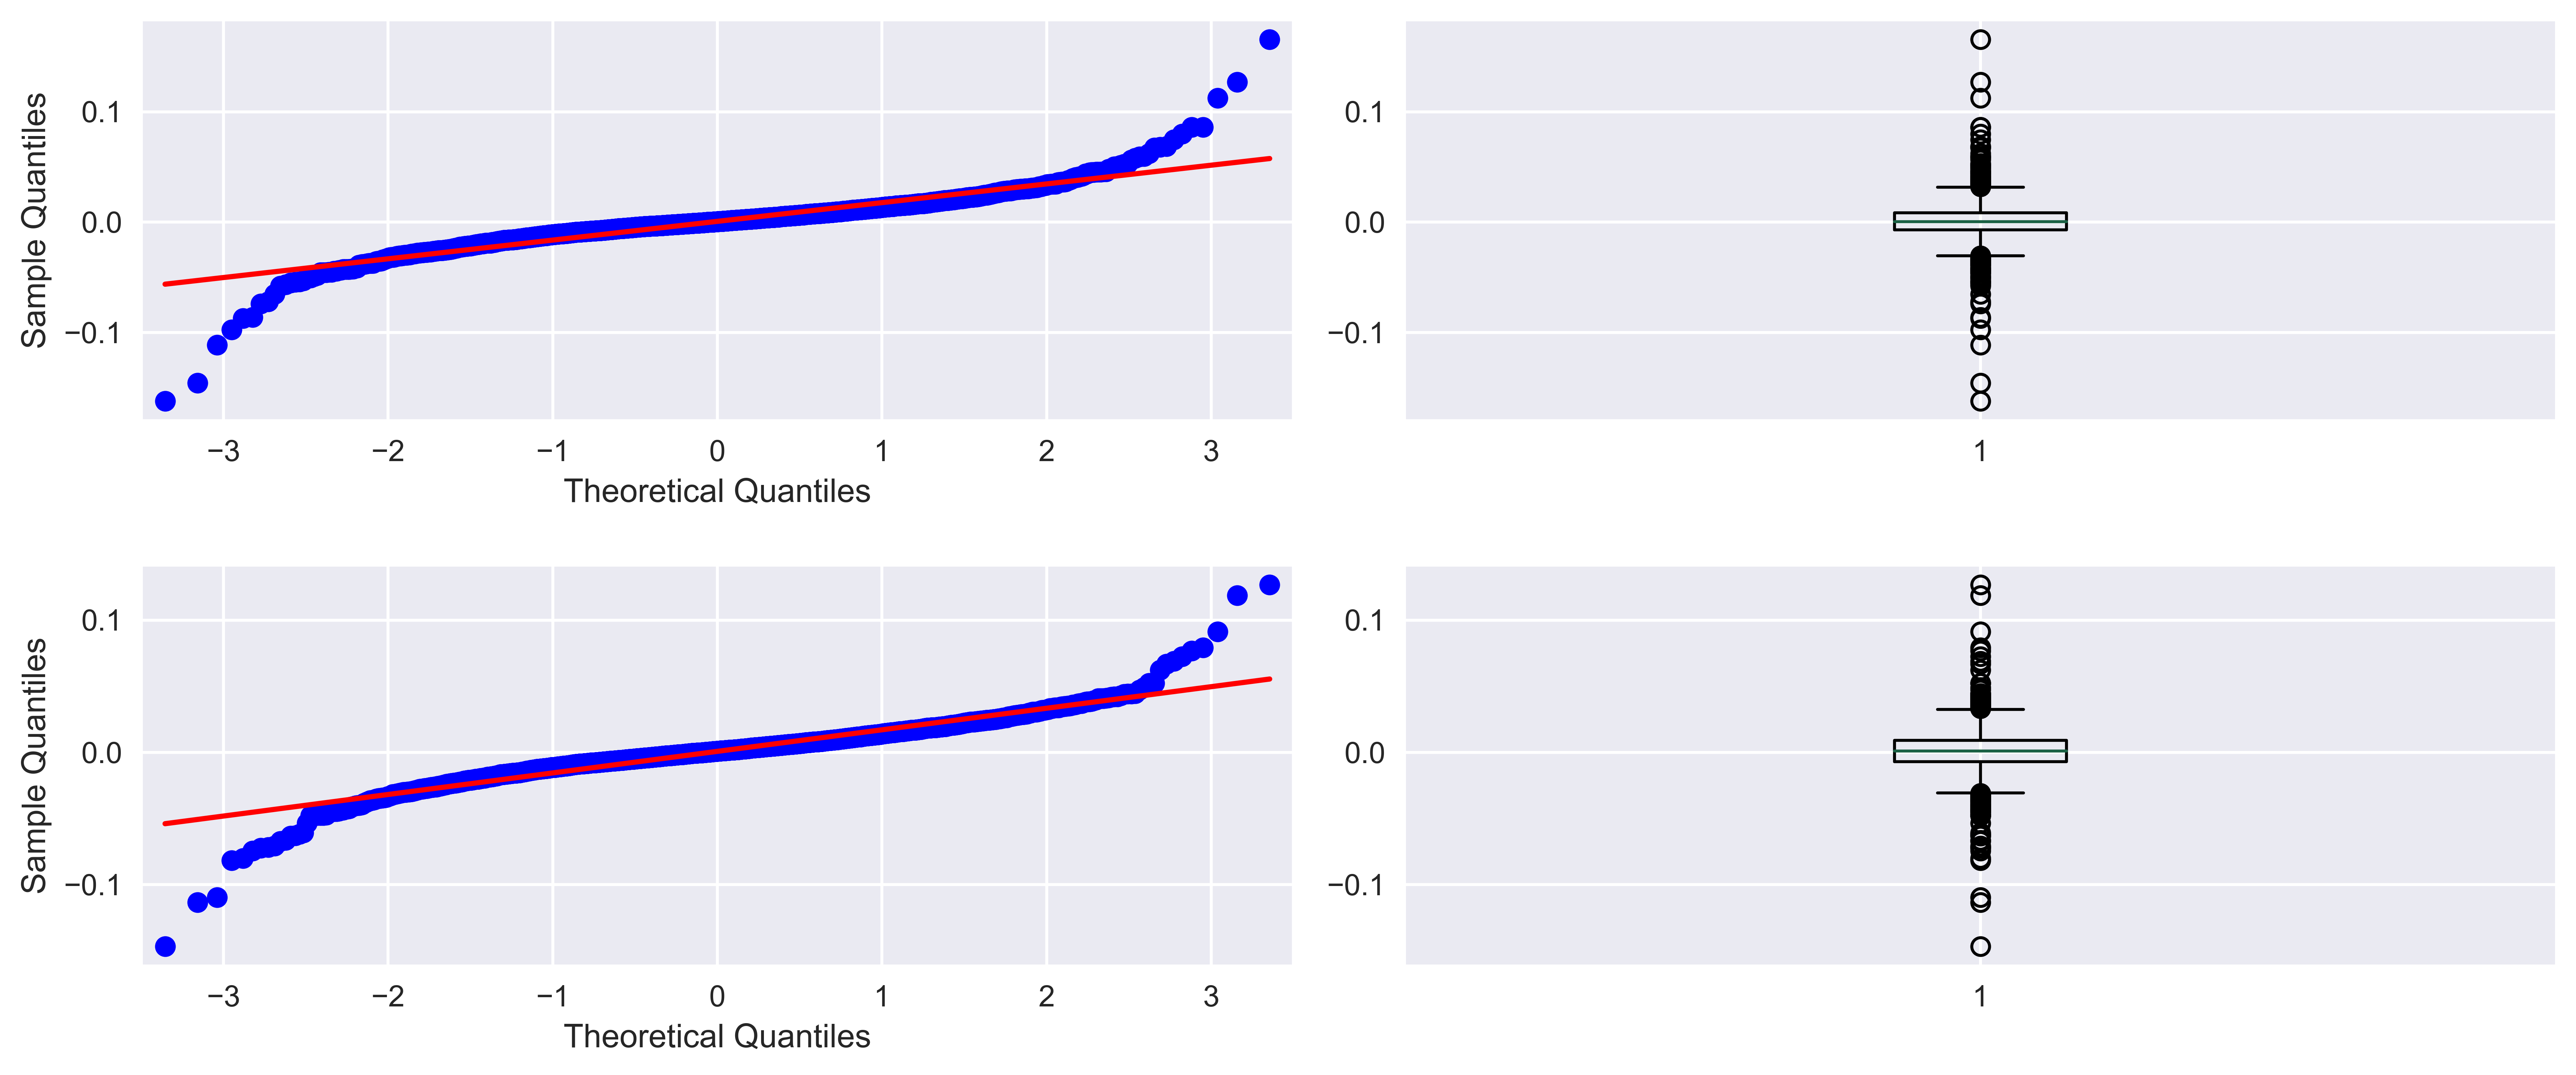

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
fig.tight_layout(h_pad=3)

sm.qqplot(log_returns.loc[:, 'JPM'], line = 's', ax=axs[0, 0])
axs[0, 1].boxplot(log_returns.loc[:, 'JPM'])

sm.qqplot(log_returns.loc[:, 'BLK'], line = 's', ax=axs[1, 0])
axs[1, 1].boxplot(log_returns.loc[:, 'BLK'])

plt.show();

c:\users\paolo\pycharmprojects\ng-strategies\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
c:\users\paolo\pycharmprojects\ng-strategies\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


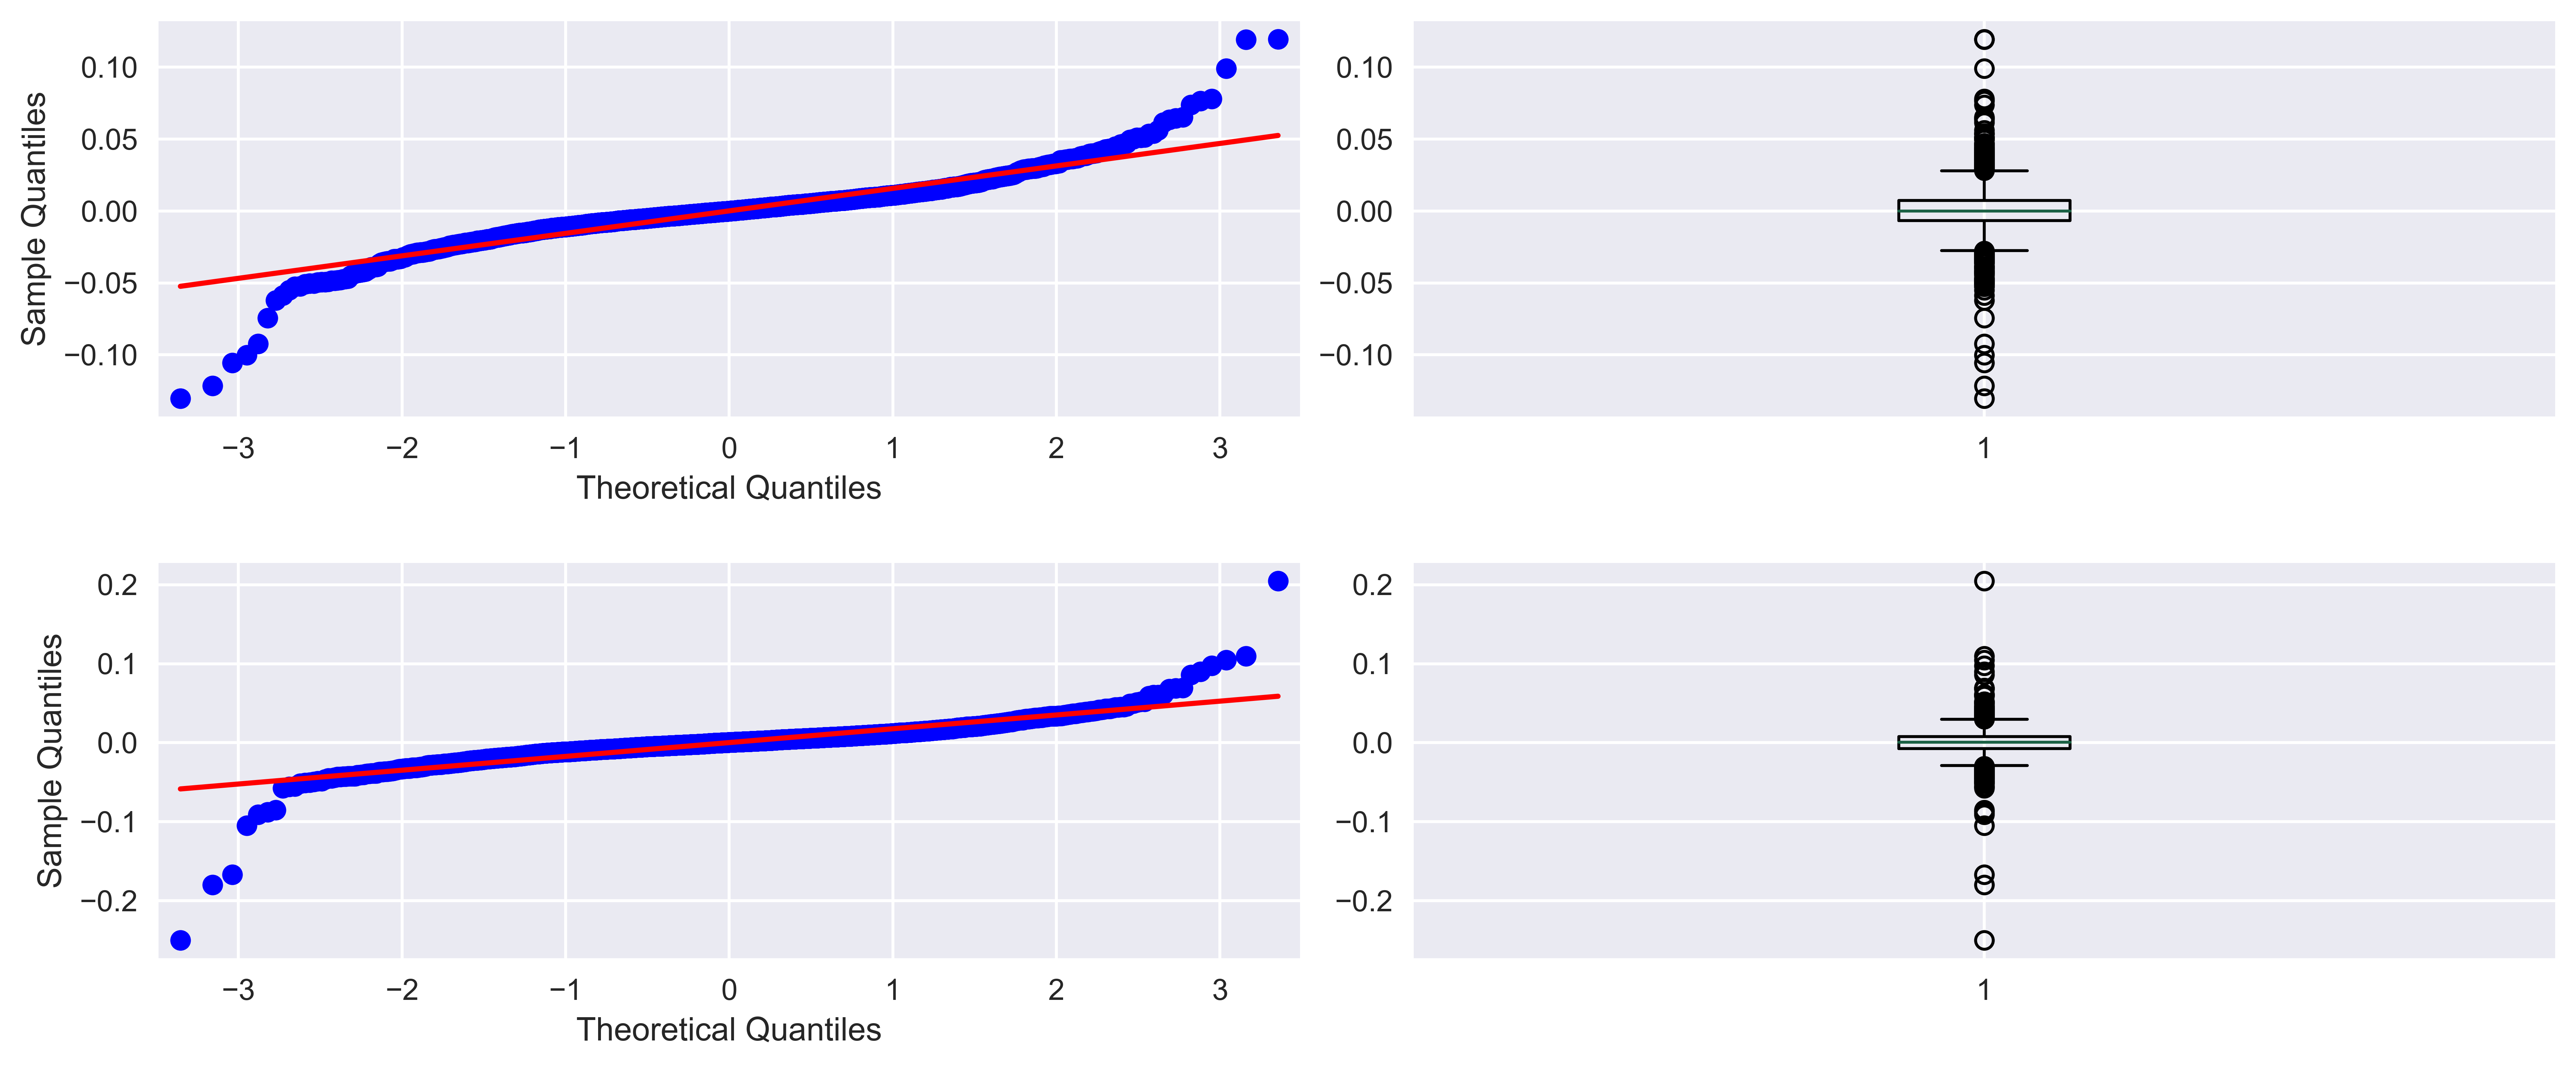

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
fig.tight_layout(h_pad=3)

sm.qqplot(log_returns.loc[:, 'XOM'], line = 's', ax=axs[0, 0])
axs[0, 1].boxplot(log_returns.loc[:, 'XOM'])

sm.qqplot(log_returns.loc[:, 'CVX'], line = 's', ax=axs[1, 0])
axs[1, 1].boxplot(log_returns.loc[:, 'CVX'])

plt.show();

## Correlazioni dei ritorni

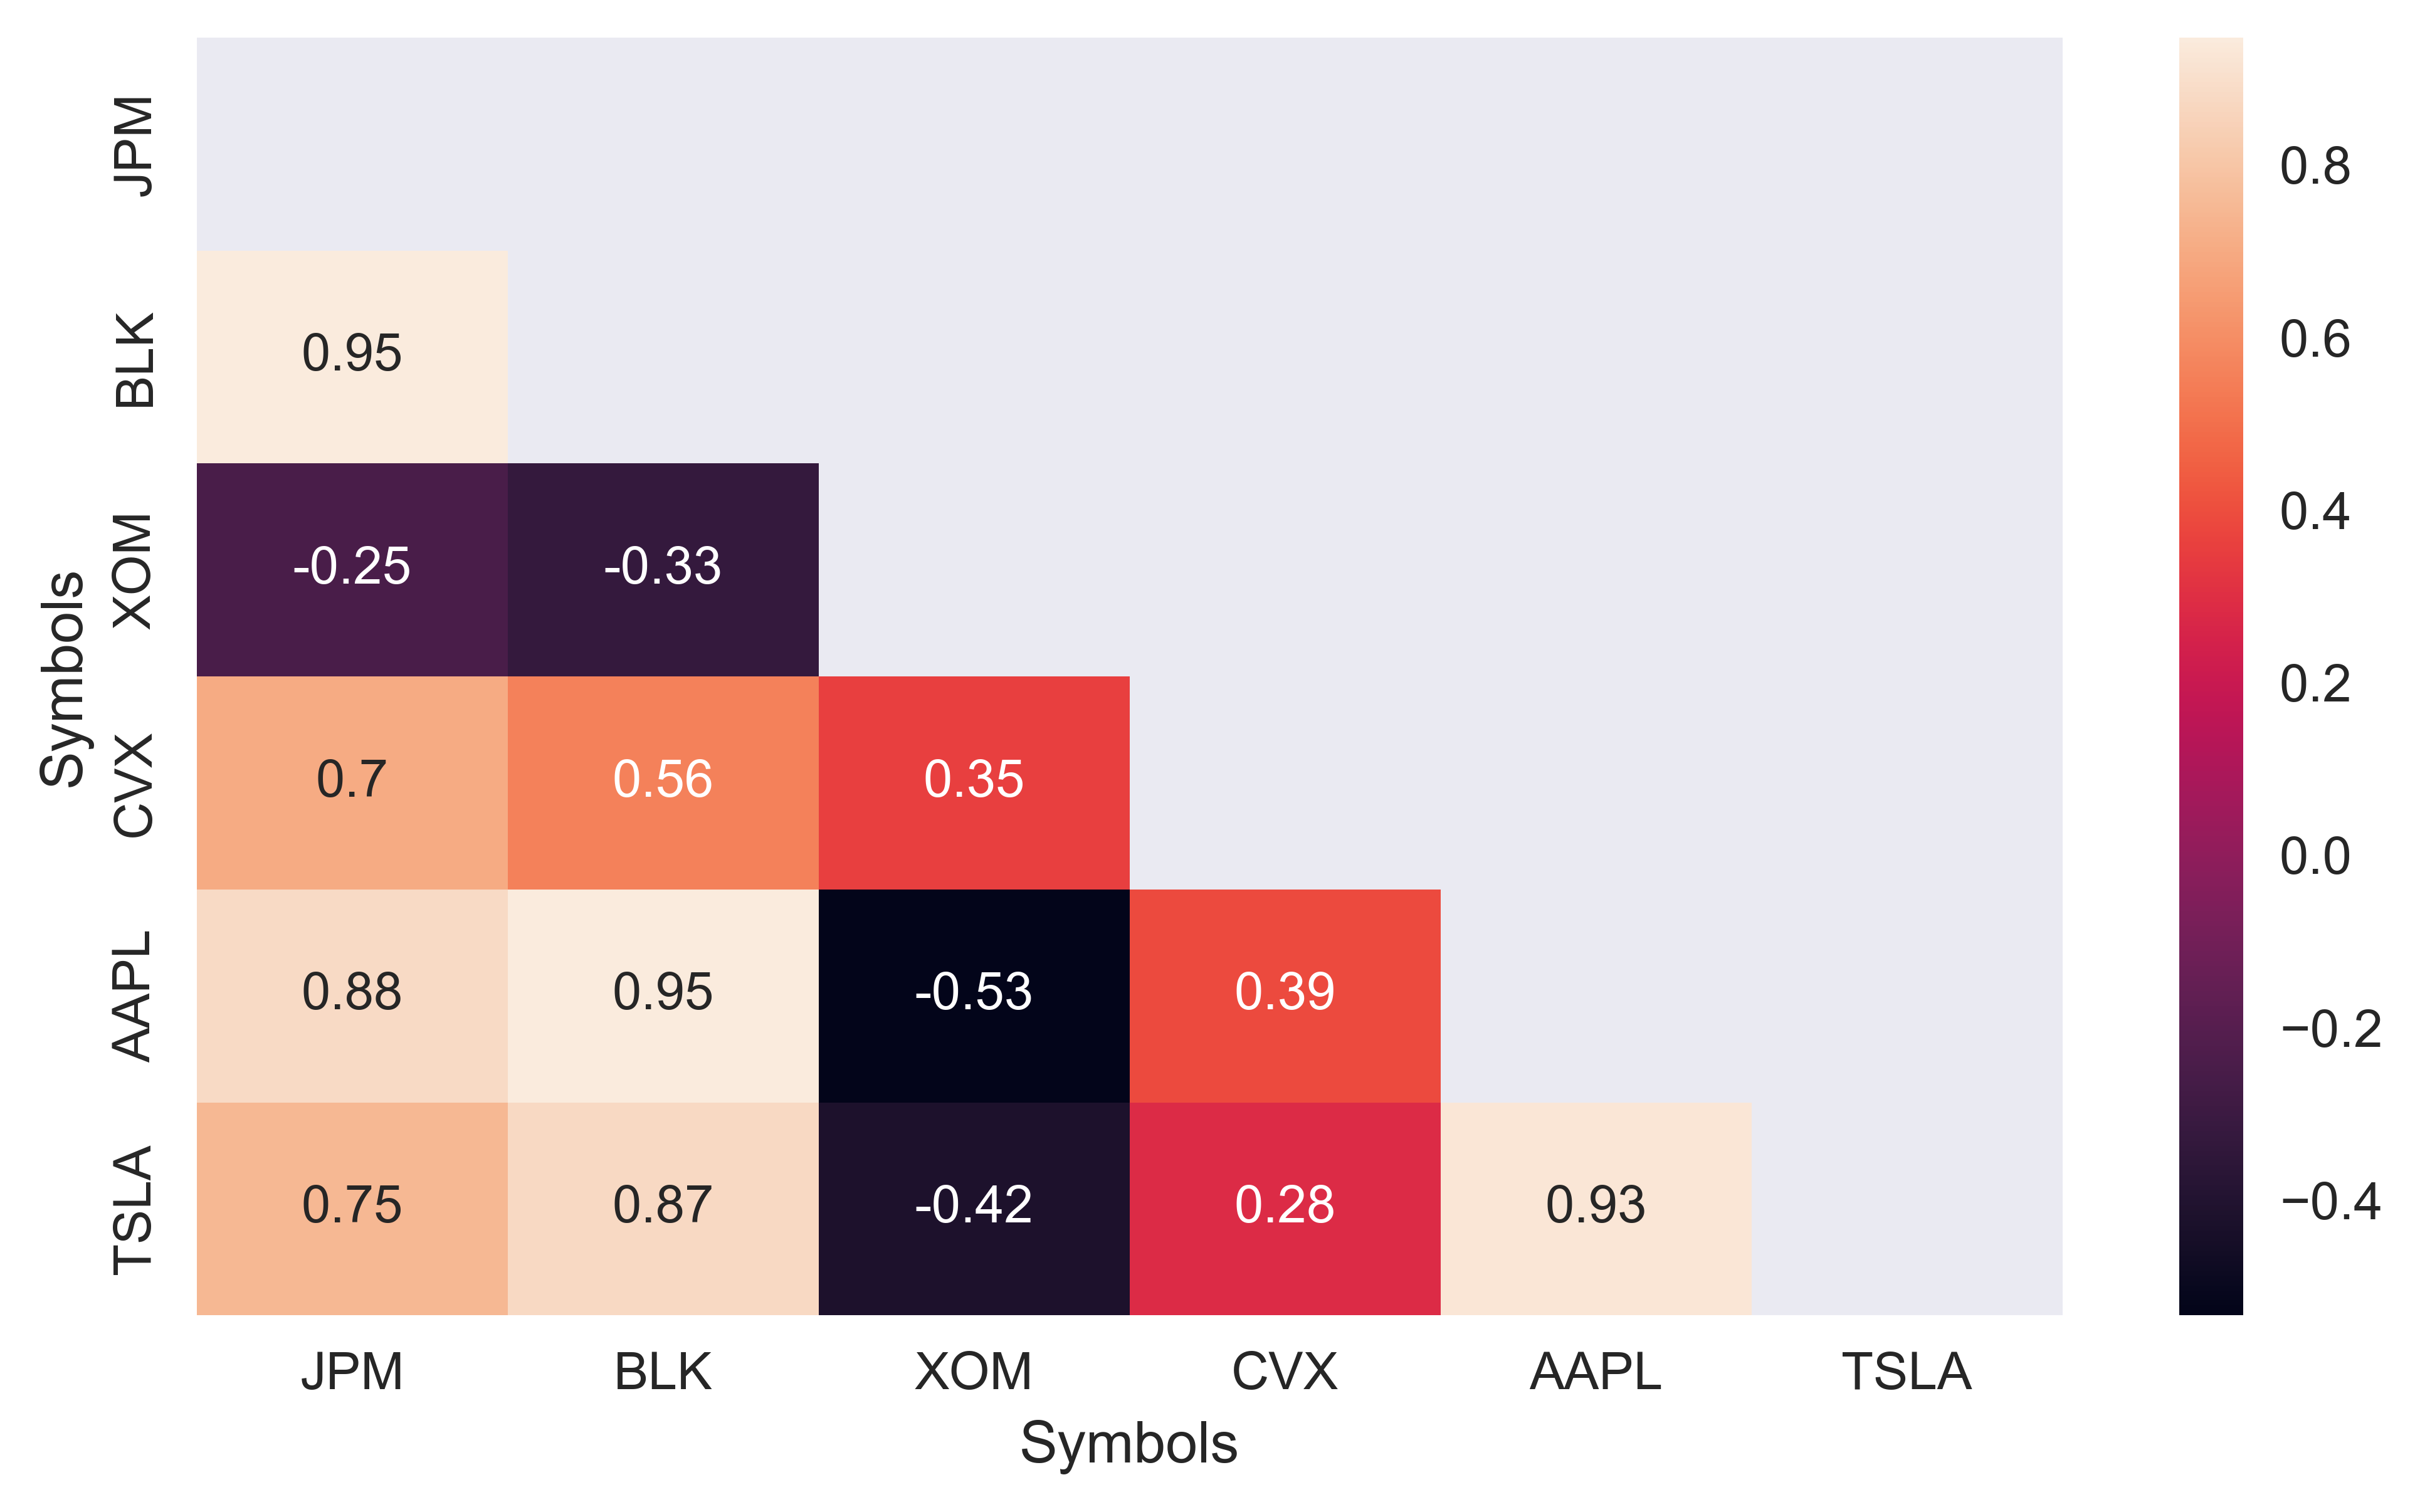

In [42]:
r_corr_matrix = stocks_df['Adj Close'].corr()

mask = np.zeros_like(r_corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(r_corr_matrix, annot=True, mask=mask);

Come possiamo notare i ritorni delle due aziende tech (AAPL e TSLA) e le due aziende in ambito finanziario possiedono un'altissima
correlazione, rispettivamente dello 0.93 e dello 0.95. Mentre una correlazione positiva significativa, cioè maggiore di 0.7, tra le aziende del settore
tech (growth companies) e del settore dei financial (considerato un settore value).

Mentre i ritorni delle aziende del settore energetico (XOM e CVX) non risultano avere una correlazione positiva significativa,
mentre in particolare XOM risulta essere correlata negativamente ai ritorni delle aziende finacial e del settore tech.

## Correlazione con gli ETF settoriali

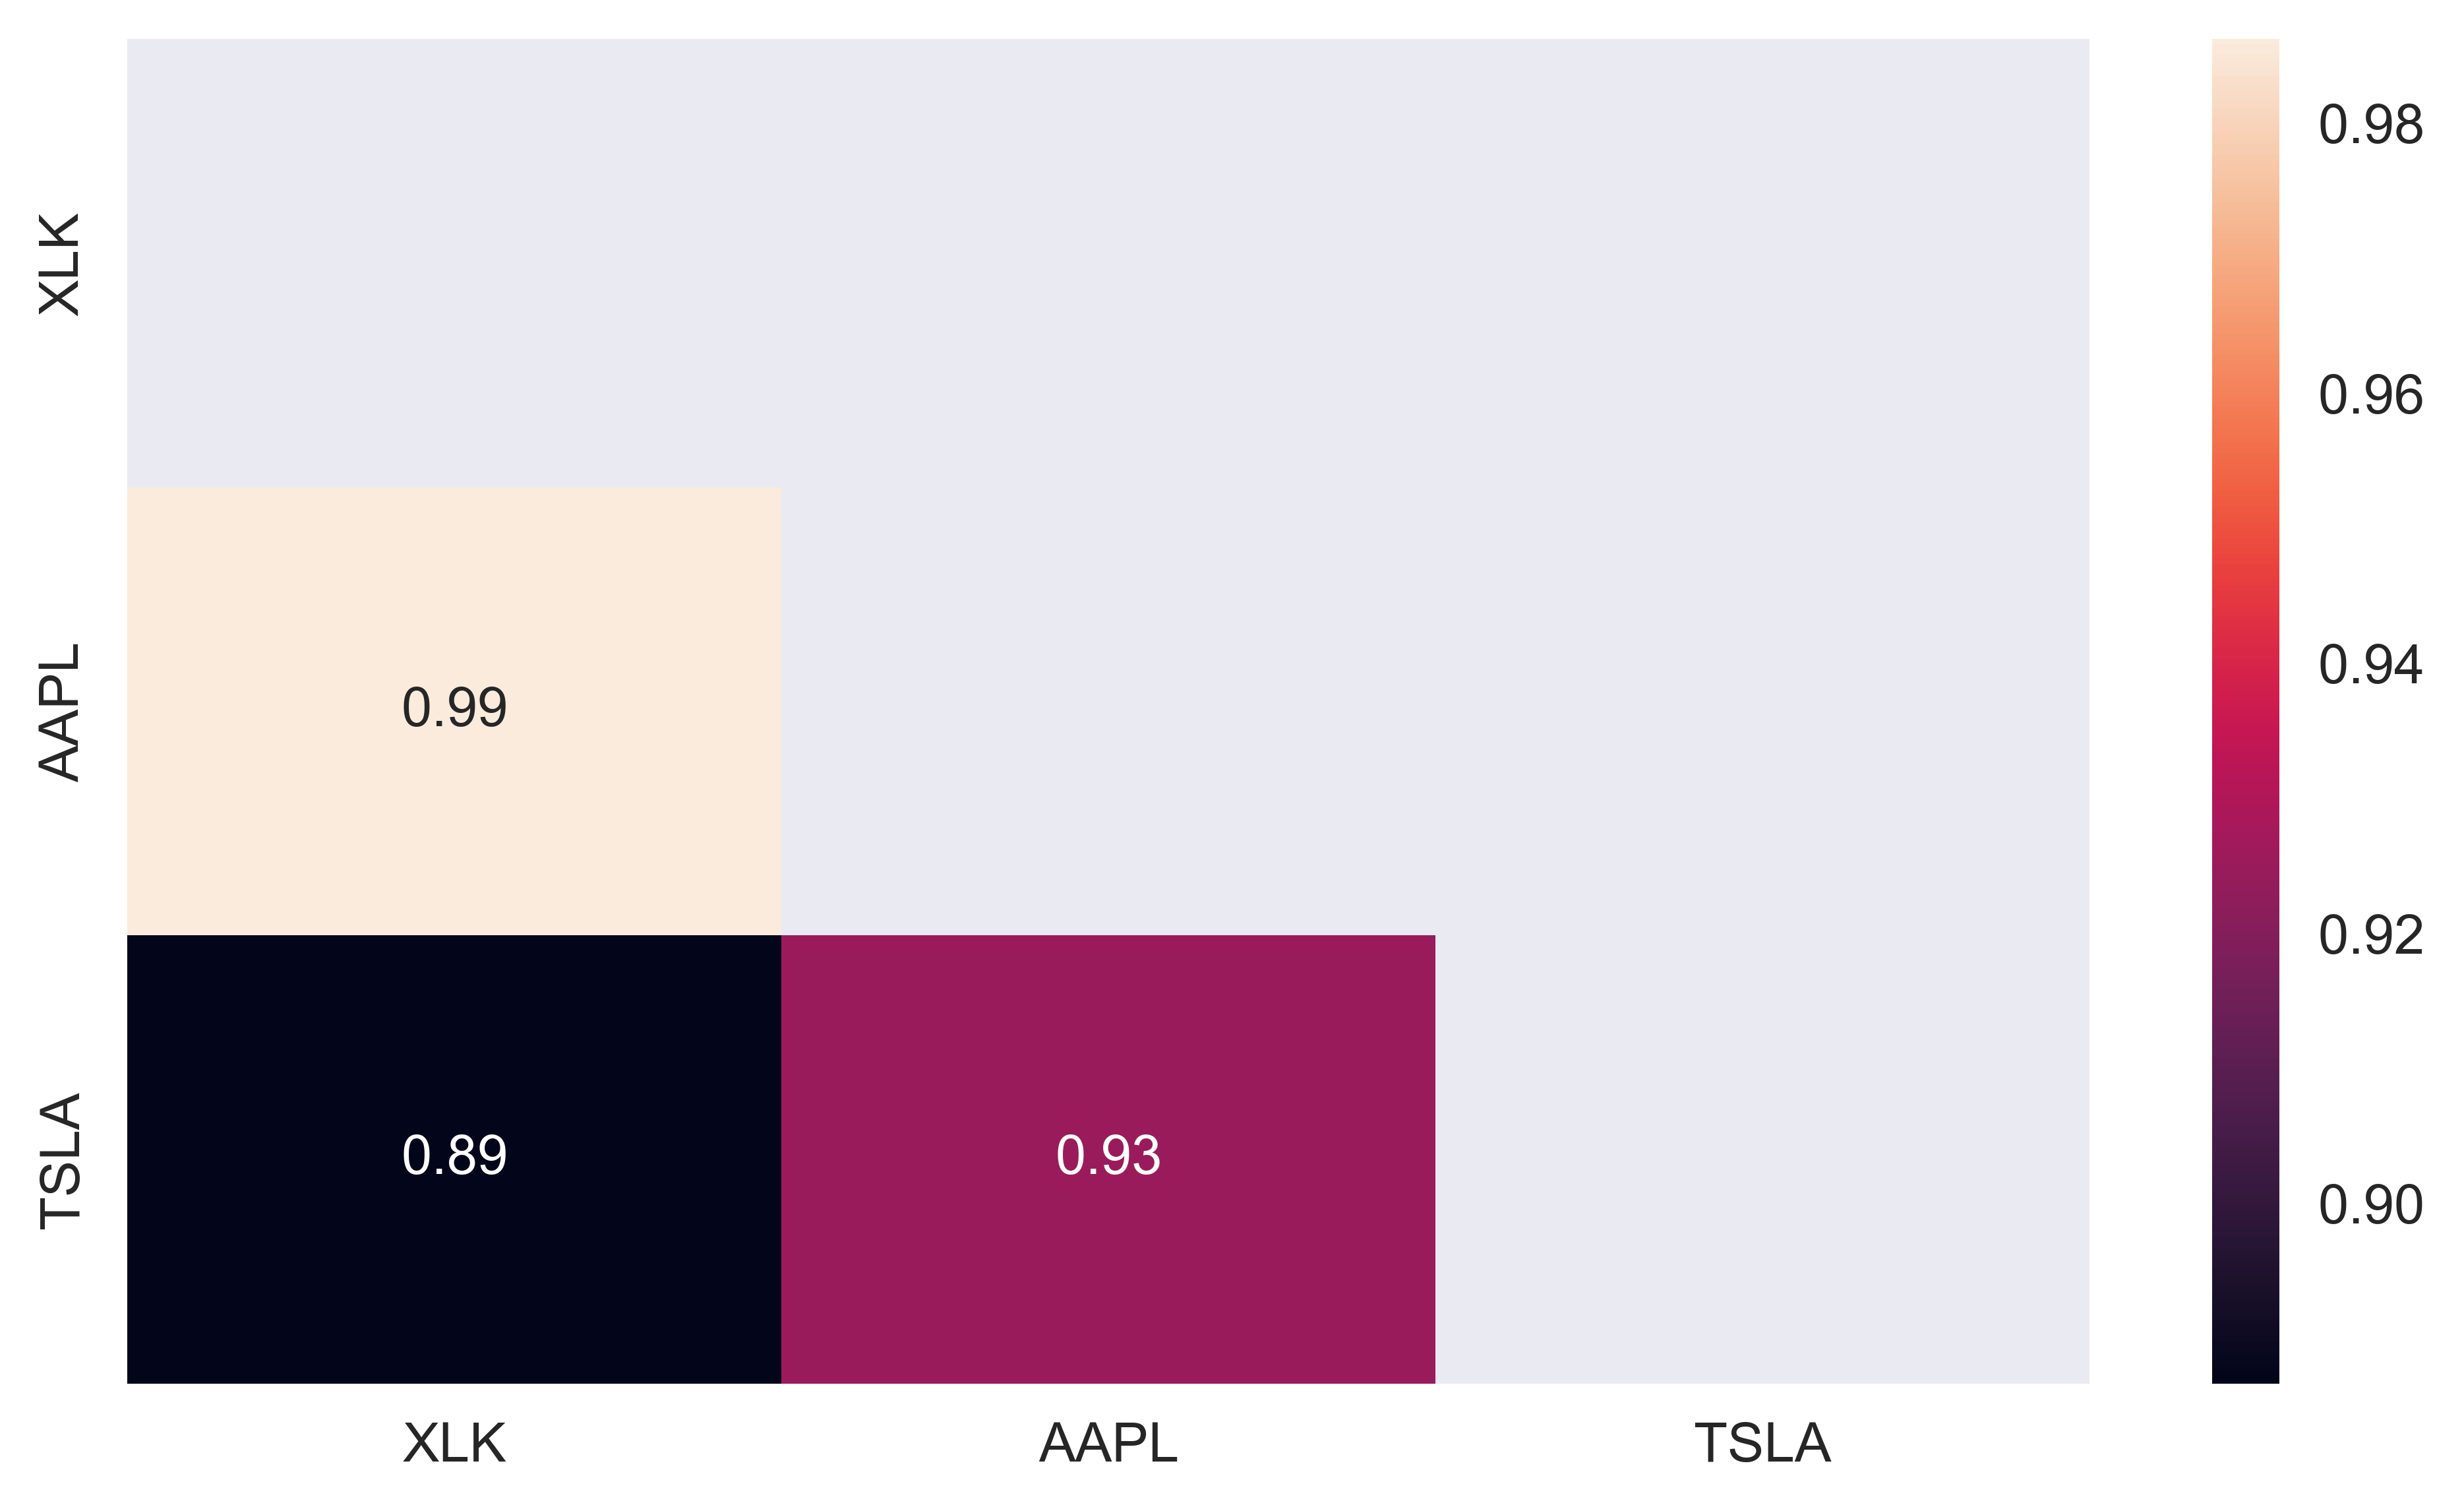

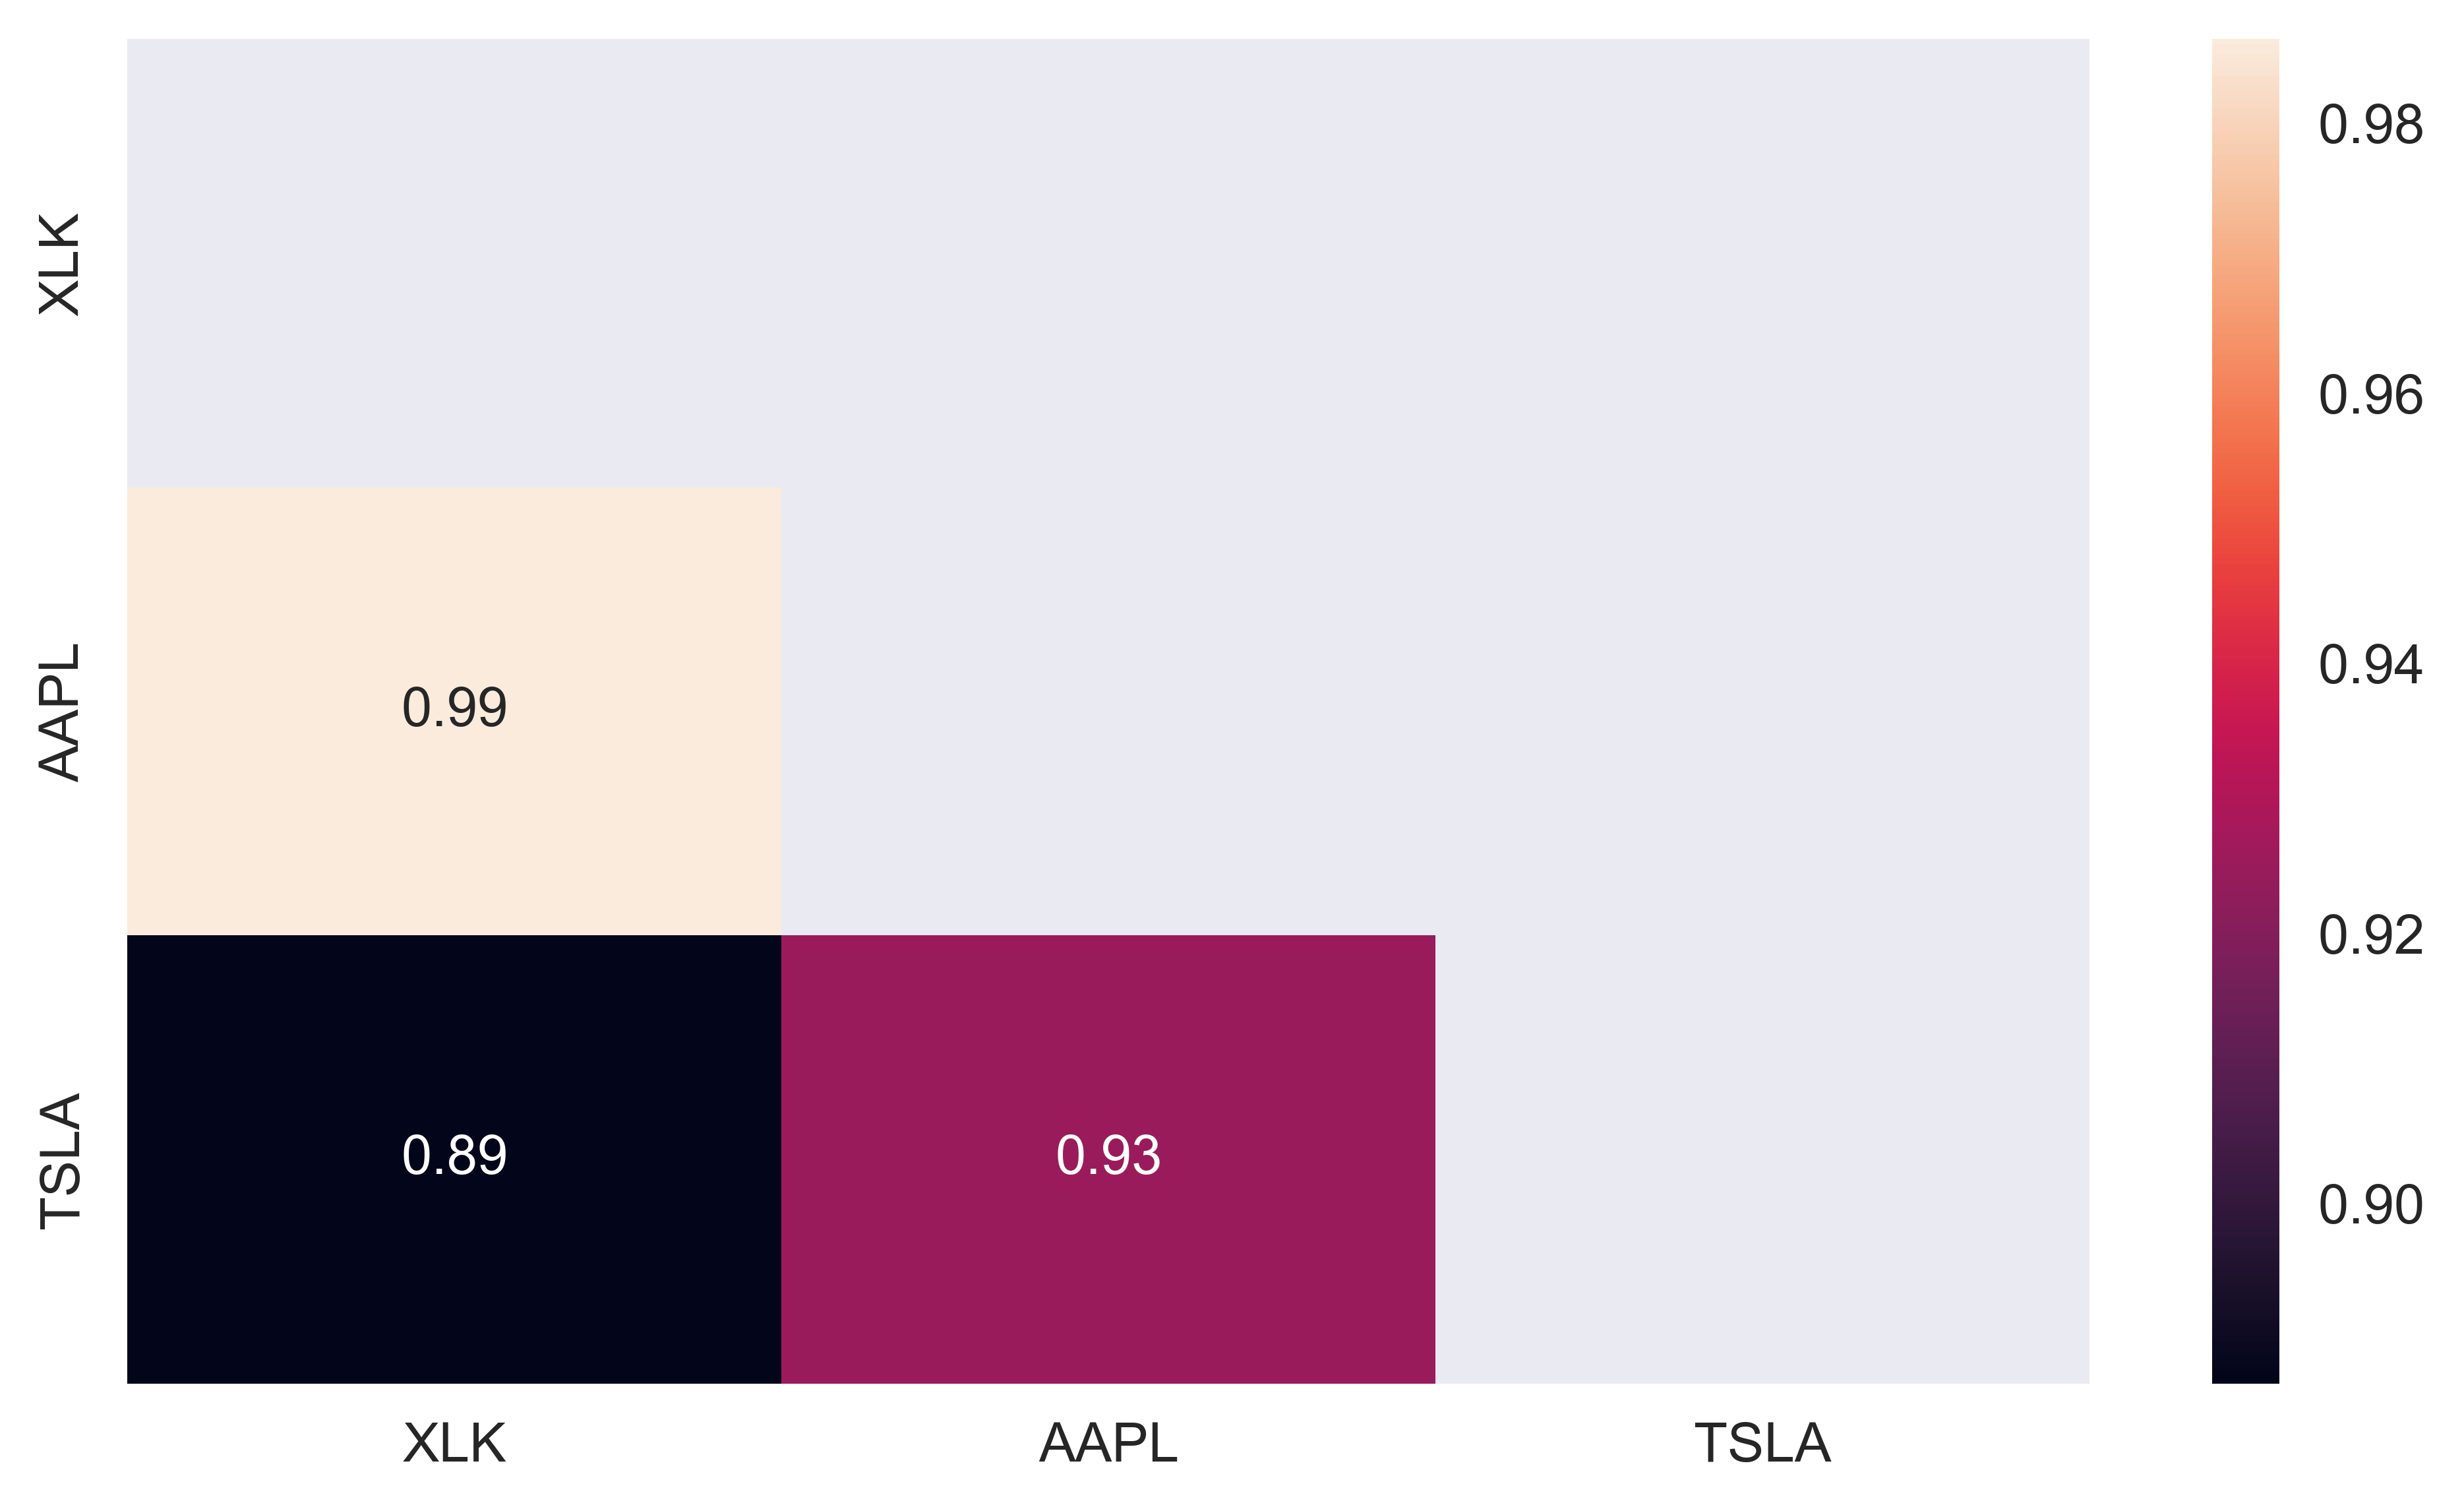

In [52]:
tech_df = pd.DataFrame(data={
    'XLK':xlk_df.close,
    'AAPL':stocks_df['Adj Close']['AAPL'],
    'TSLA':stocks_df['Adj Close']['TSLA']},
    index=xlk_df.index
)

tech_corr = tech_df.corr()

mask = np.zeros_like(tech_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(tech_corr, annot=True, mask=mask);

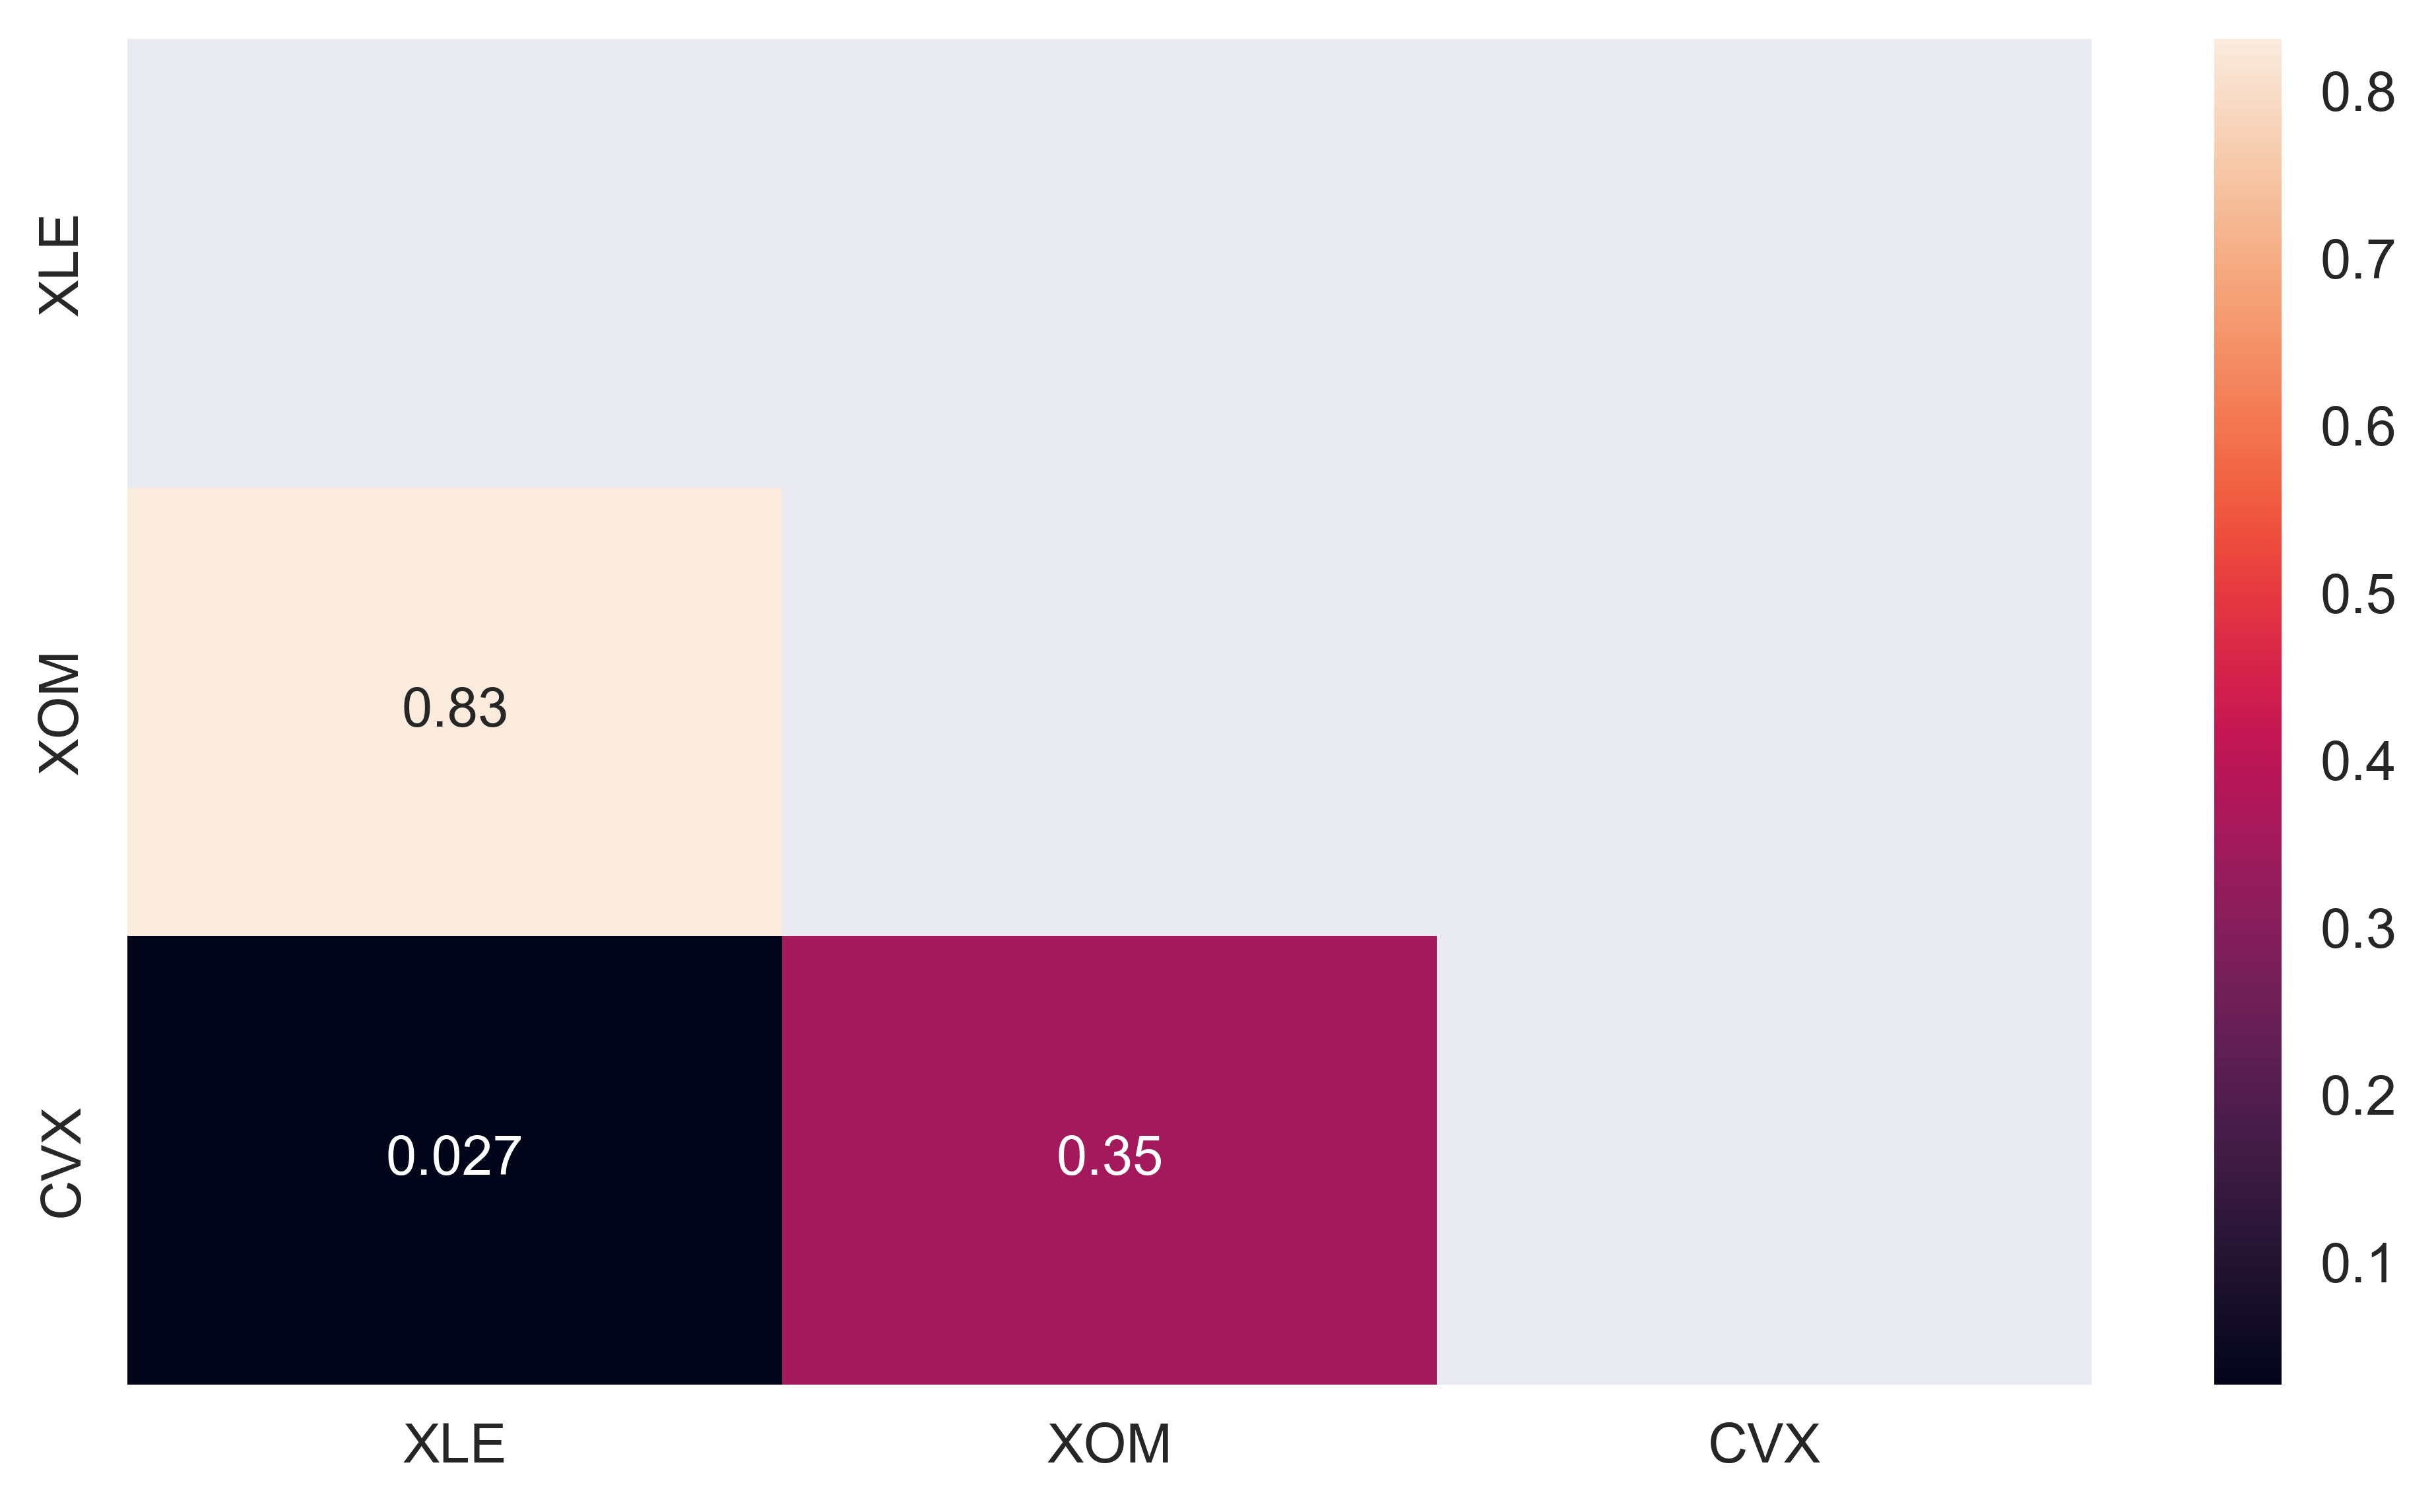

In [53]:
energy_df = pd.DataFrame(data={
    'XLE':xle_df.close,
    'XOM':stocks_df['Adj Close']['XOM'],
    'CVX':stocks_df['Adj Close']['CVX']},
    index=xlk_df.index
)

energy_corr = energy_df.corr()

mask = np.zeros_like(energy_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(energy_corr, annot=True, mask=mask);

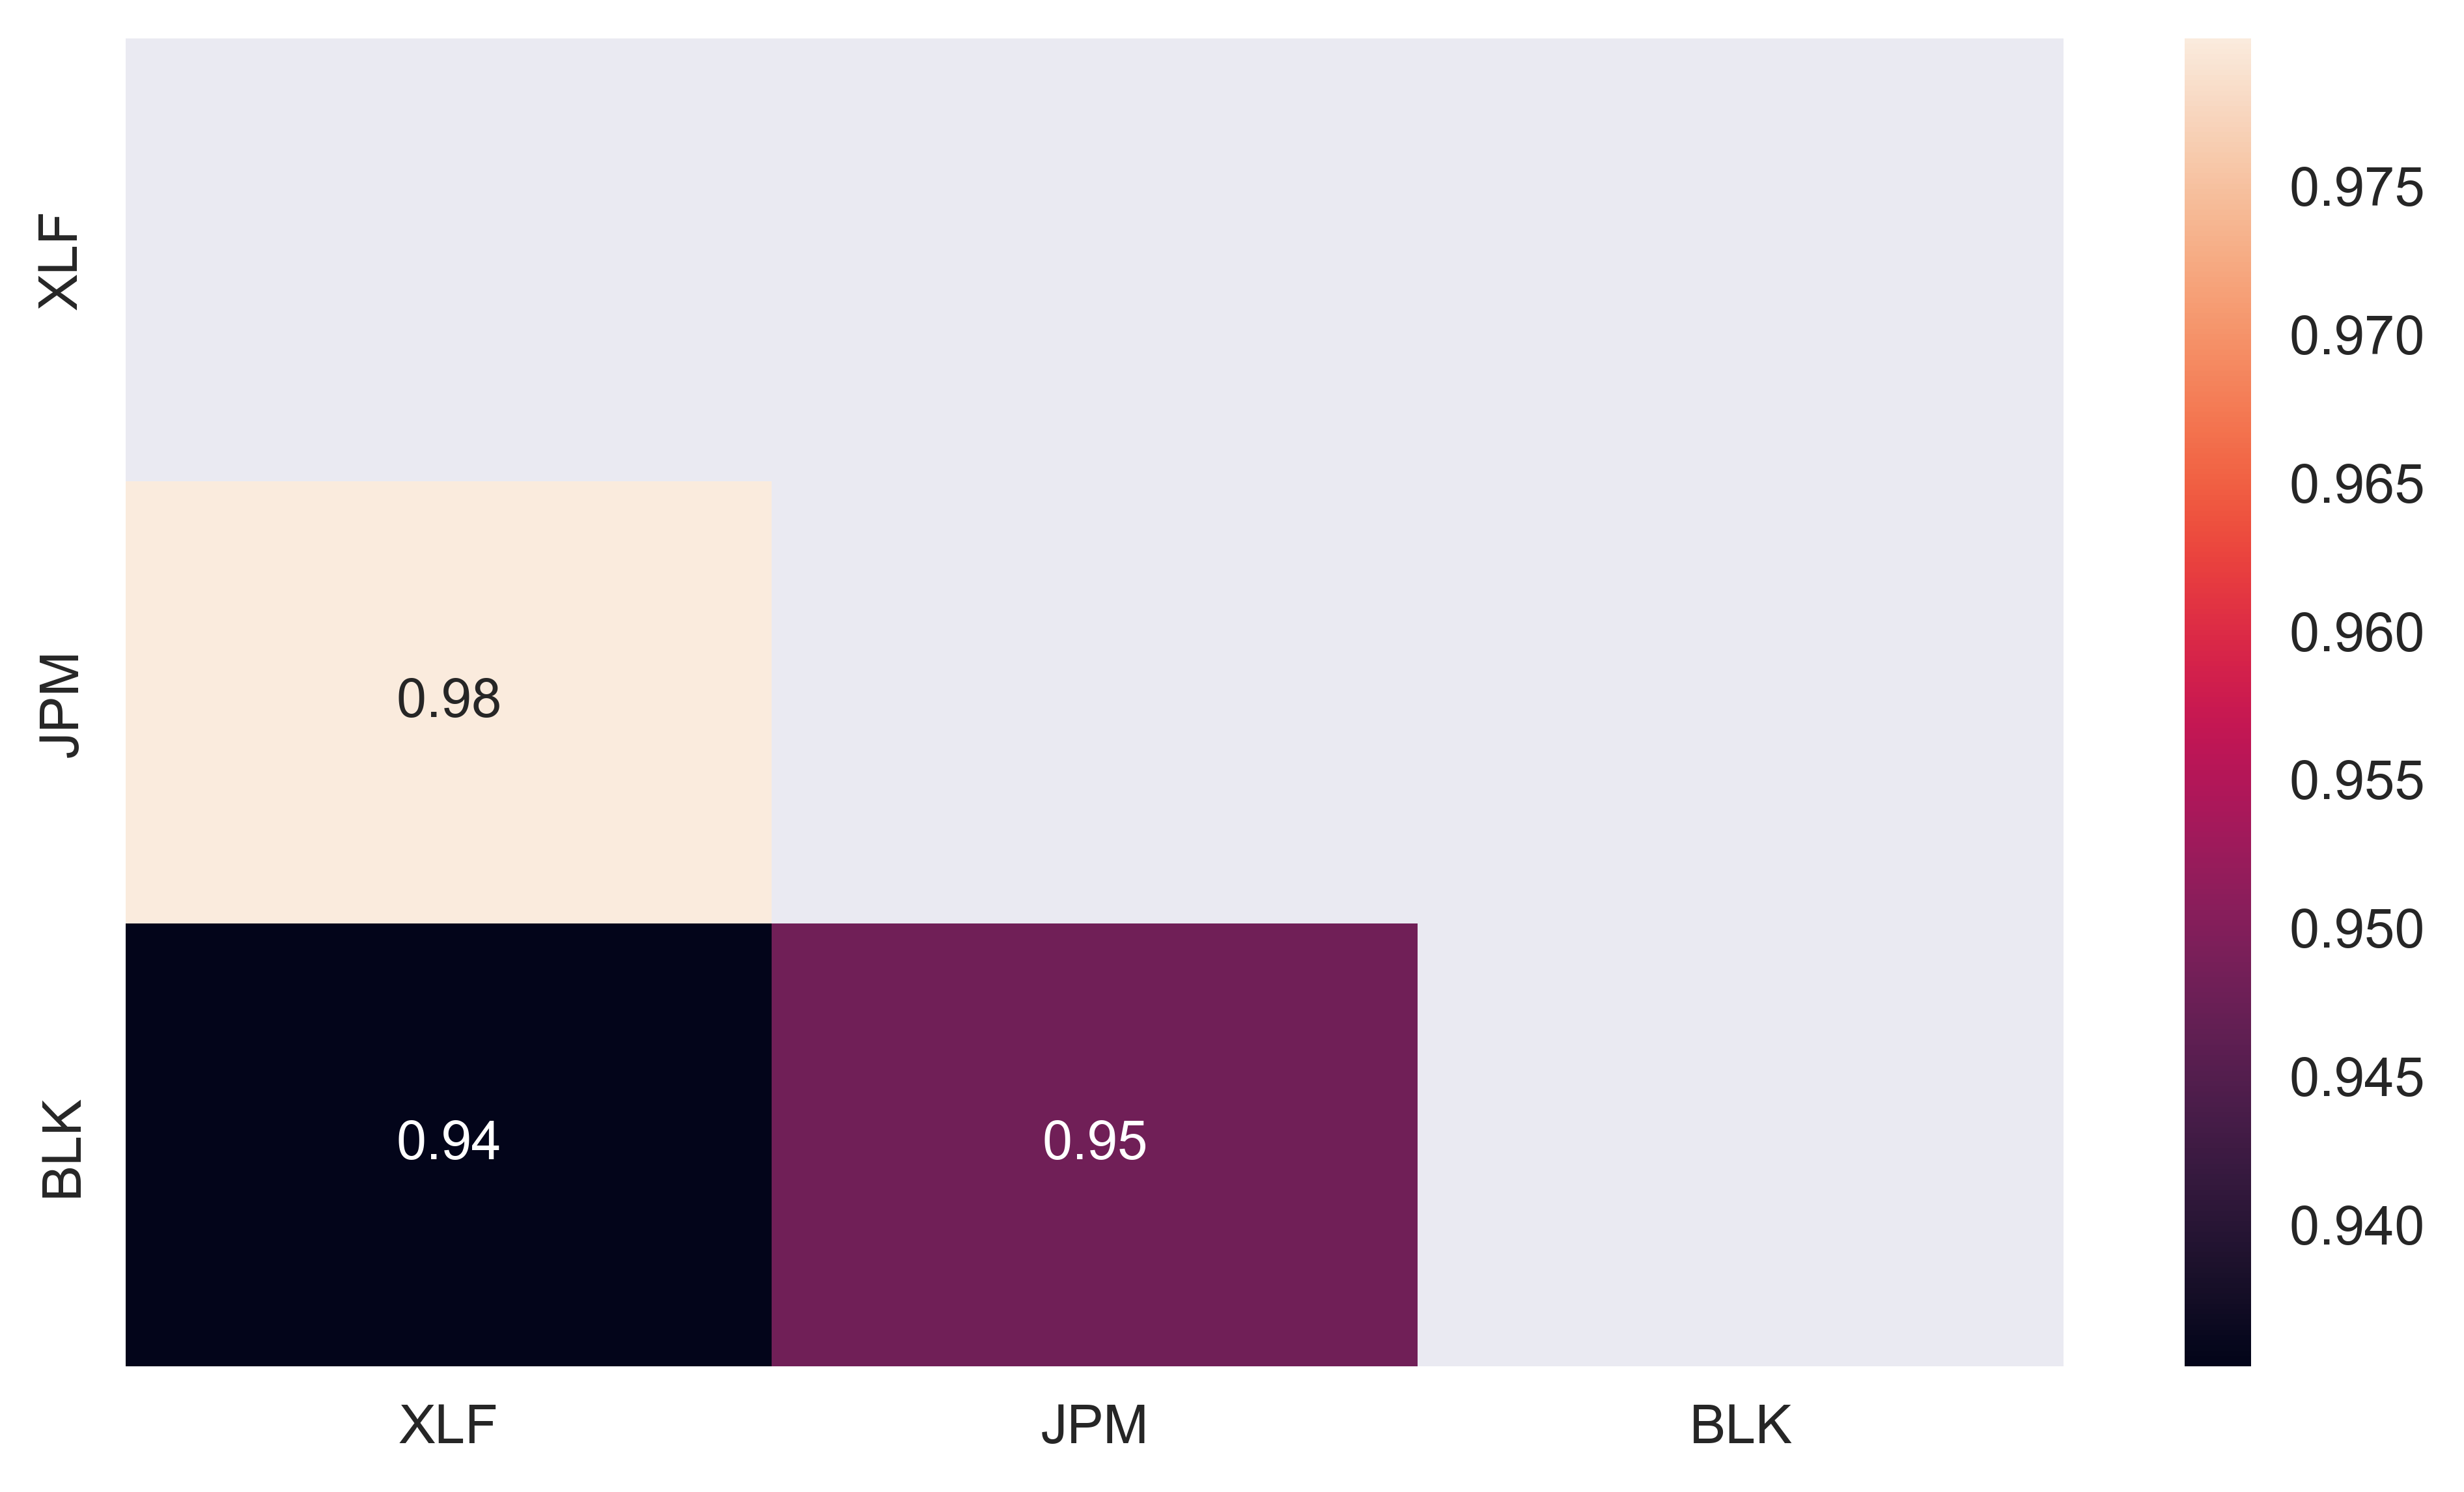

In [54]:
financial_df = pd.DataFrame(data={
    'XLF':xlf_df.close,
    'JPM':stocks_df['Adj Close']['JPM'],
    'BLK':stocks_df['Adj Close']['BLK']},
    index=xlk_df.index
)

fin_corr = financial_df.corr()

mask = np.zeros_like(fin_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(fin_corr, annot=True, mask=mask);

## Matrice correlazione tra ETF settoriali


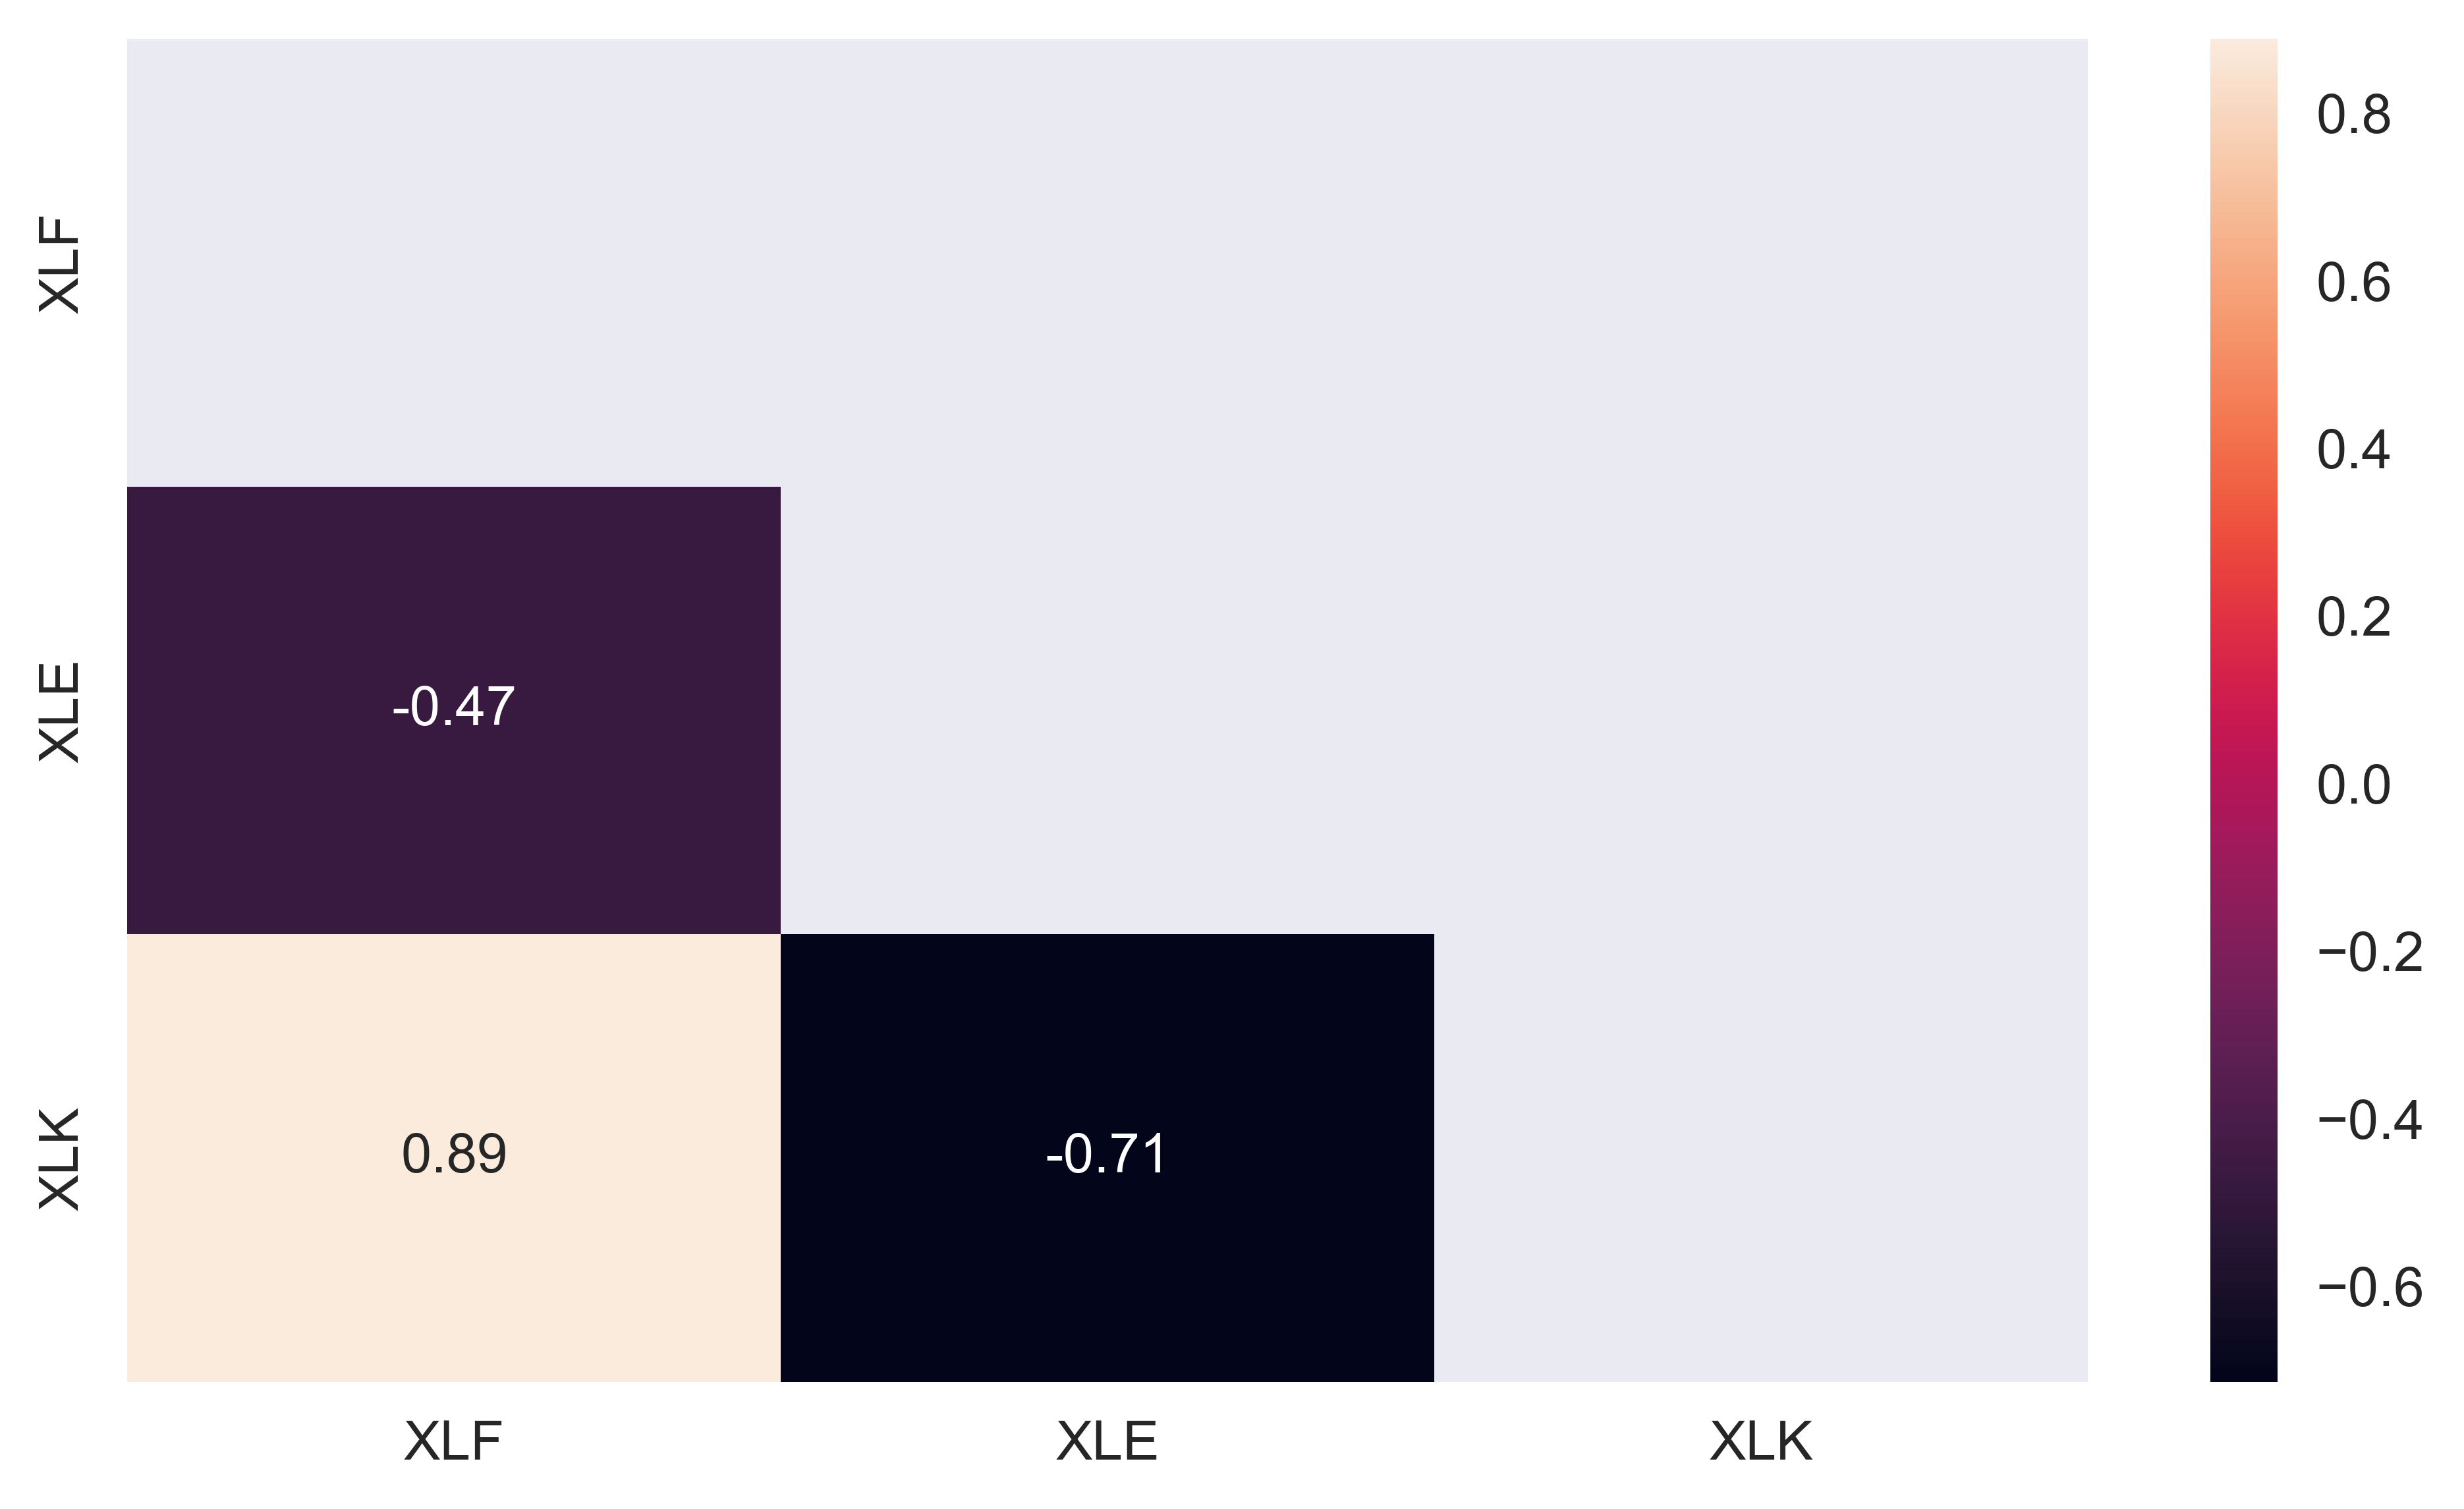

In [57]:
sectors_df = pd.DataFrame(data={
    'XLF':xlf_df.close,
    'XLE':xle_df.close,
    'XLK':xlk_df.close,},
    index=xlk_df.index
)

sectors_corr = sectors_df.corr()

mask = np.zeros_like(sectors_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(sectors_corr, annot=True, mask=mask);


## Matrice delle covarianze

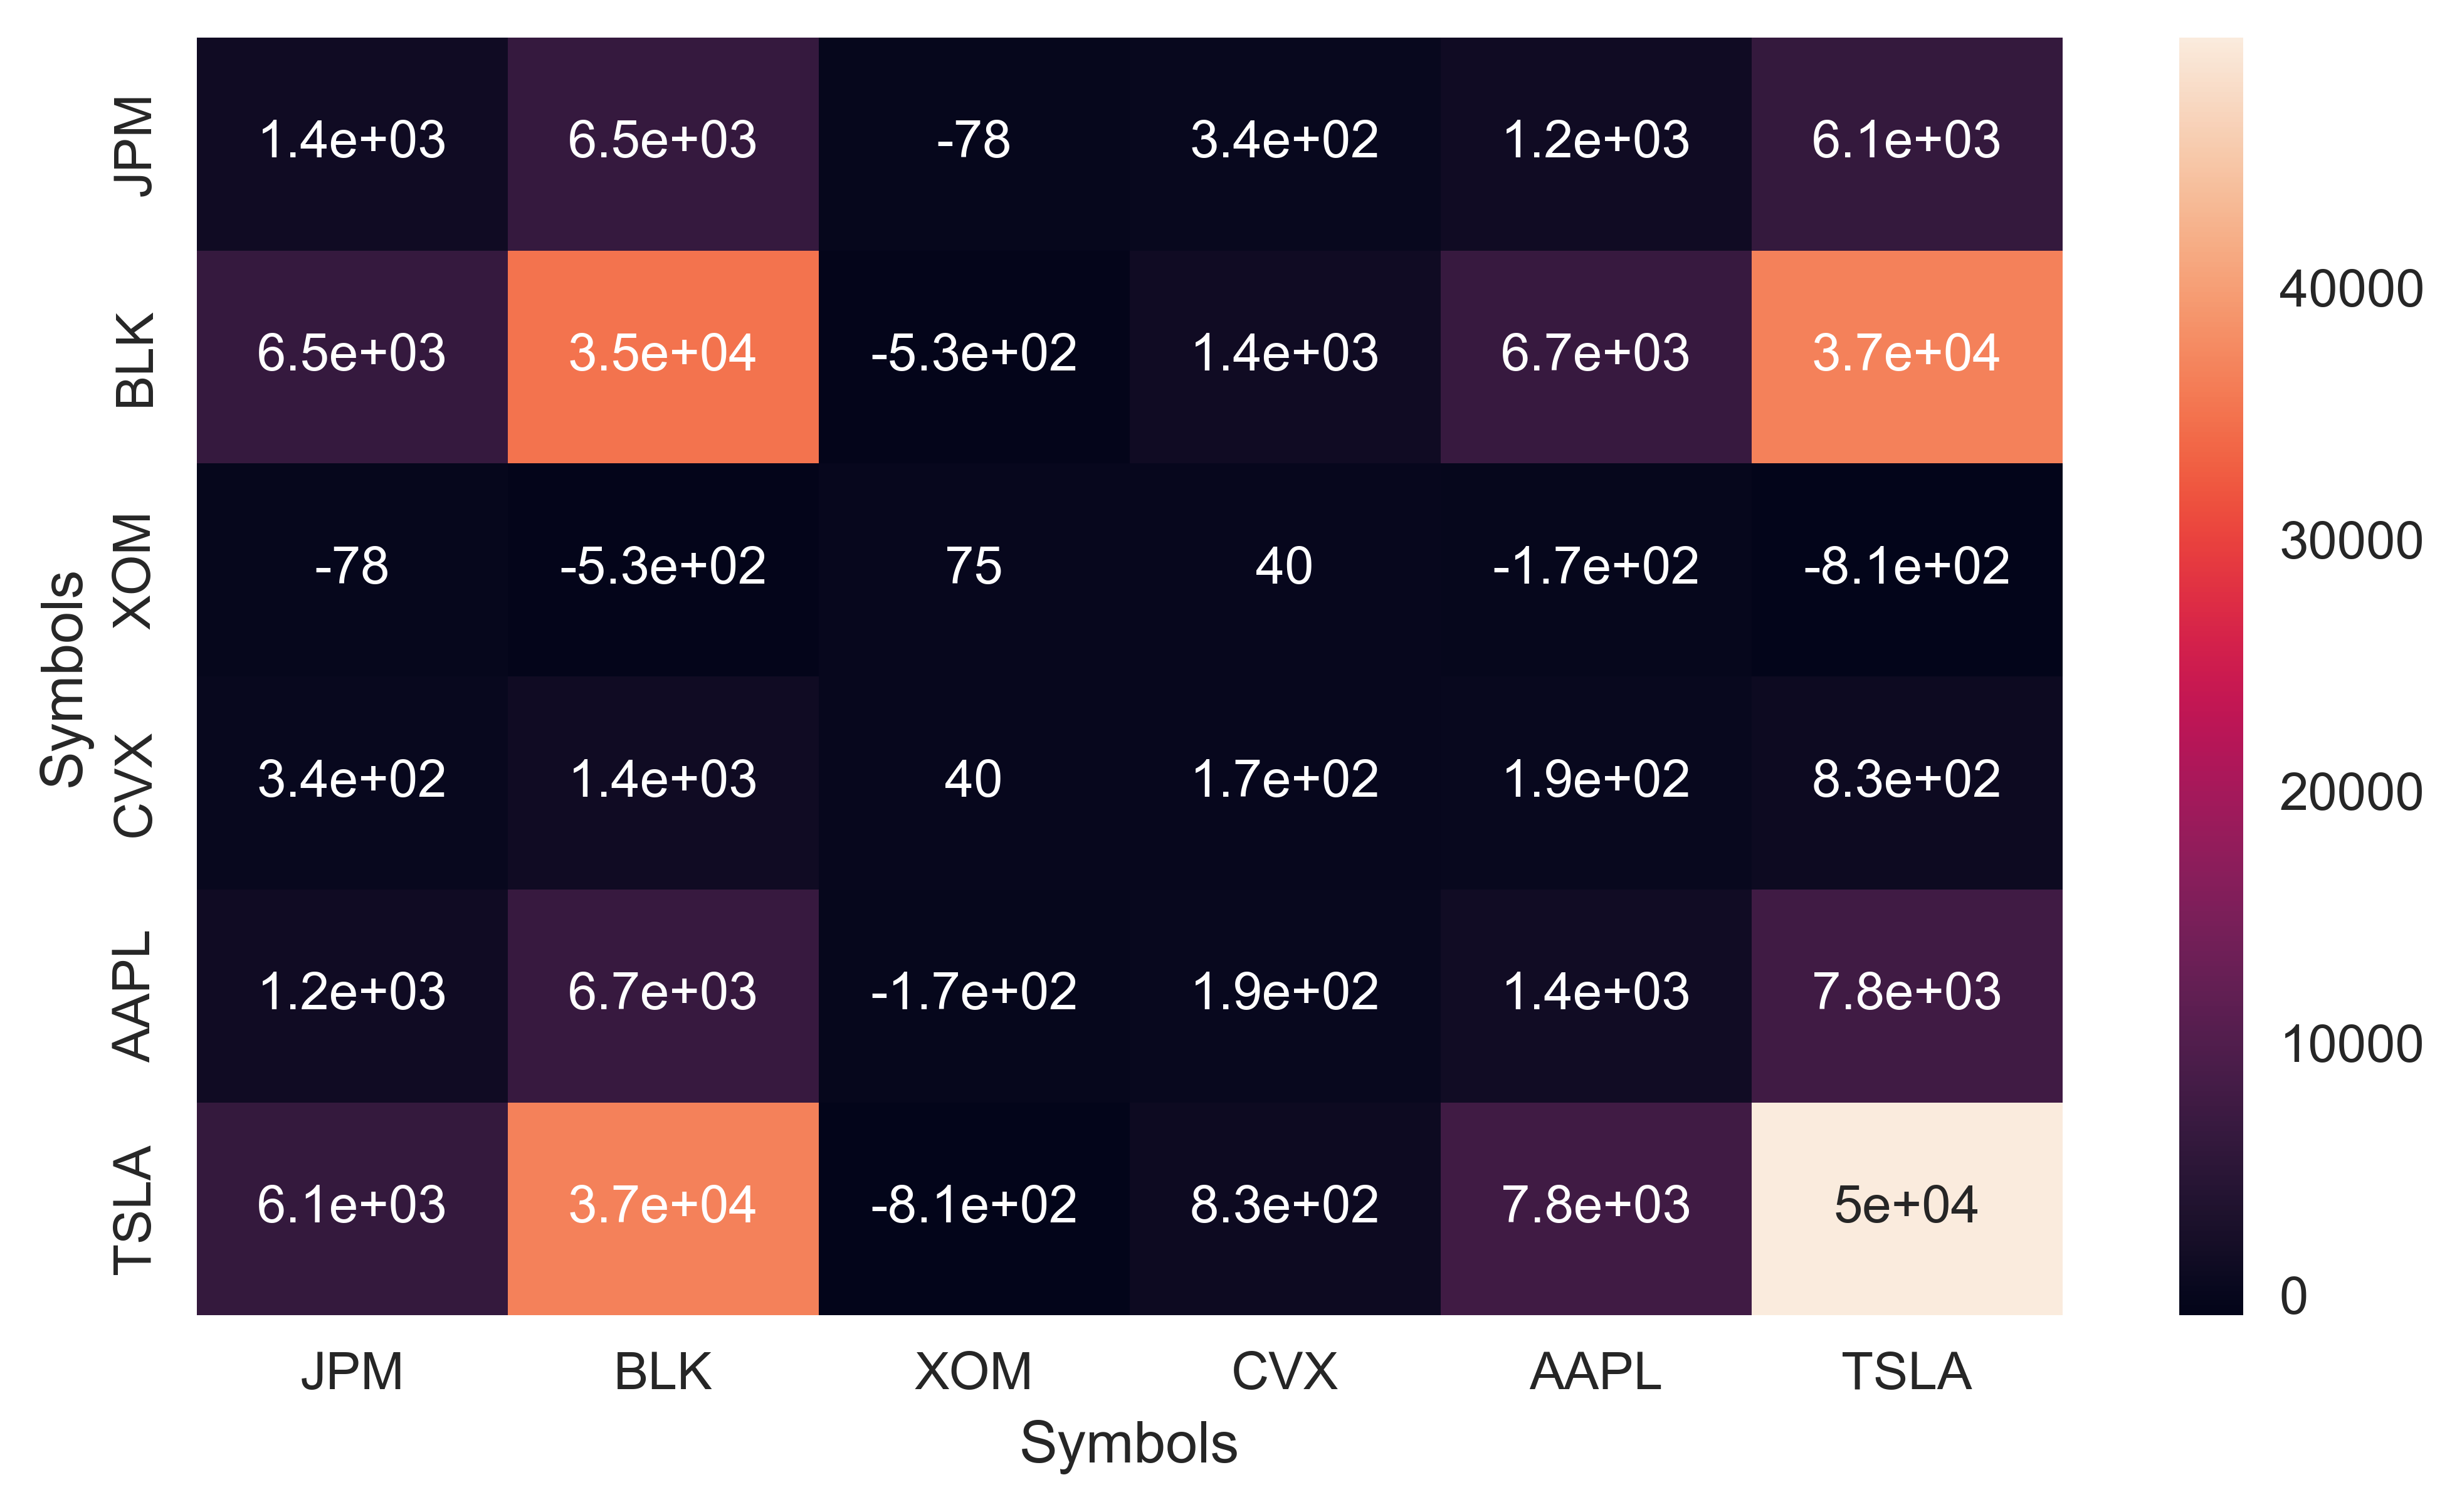

In [56]:
sns.heatmap(stocks_df['Adj Close'].cov(), annot=True);